# Austin Animal Shelter Data Analytics Project

This objective of this project is to understand and prepare the data obtained from an animal center in Austin, USA.

This animal centre is concerned with animal welfare and reducing the risk of animal death. The shelter wants to use the data collected about their animals to build a data analytics solution for death risk prediction to help them in their planning towards improving the welfare of the animals they shelter. The shelter collects some data for each animal they take in (columns in the dataset with keyword "intake") and also records the status of each animal when it left the shelter (columns in the dataset with keyword "outcome"). The target variable to predict is a binary variable called binary_outcome. For this variable, the value “1” indicates that after intake, the animal outcome was negative, e.g., "death", while the value "0" indicates that the animal outcome was a positive one, e.g., was adopted or returned to the owner. The dataset we work with is a sample of the data released by this shelter: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

This notebook is divided into 4 sections:
- Section 1 will focus on understanding and visualising the data in order to prepare a Data Quality Report.
- Section 2 will perform data cleansing based on a completed Data Quality Plan.
- Section 3 will look at the relationships between a selected subset of features and the outcome risk.
- Section 4 will derive additional features from existing data to better capture the problem and outcome risk.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [131]:
# load the dataset
df = pd.read_csv("AnimalWelfareRisk.csv")

# 1. Preparing the Data Quality Report

In [132]:
df.head()

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A751569,Ebzy,06/09/2017 03:26:00 PM,06/09/2017 03:26:00 PM,12201 Von Quintus in Austin (TX),Stray,Normal,Cat,Intact Female,3 months,...,Ebzy,06/19/2017 05:34:00 PM,06/19/2017 05:34:00 PM,02/22/2017,Cat,Intact Female,3 months,Domestic Shorthair Mix,Black,0.0
1,A742125,*Marcelle,01/15/2017 12:24:00 PM,01/15/2017 12:24:00 PM,1105 Red Cliff Rd in Austin (TX),Stray,Sick,Cat,Intact Male,1 year,...,*Marcelle,02/04/2017 02:27:00 PM,02/04/2017 02:27:00 PM,01/15/2016,Cat,Intact Male,1 year,Domestic Shorthair Mix,Black/White,0.0
2,A715769,M. Kiki,11/09/2015 02:41:00 PM,11/09/2015 02:41:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14 years,...,M. Kiki,12/10/2015 01:11:00 PM,12/10/2015 01:11:00 PM,11/09/2001,Cat,Neutered Male,14 years,Domestic Shorthair Mix,Orange Tabby,0.0
3,A719223,Flower,01/15/2016 02:47:00 PM,01/15/2016 02:47:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,11 years,...,Flower,02/15/2016 12:10:00 PM,02/15/2016 12:10:00 PM,01/15/2005,Cat,Spayed Female,11 years,Bombay Mix,Black,0.0
4,A724757,NaN,04/21/2016 01:53:00 PM,04/21/2016 01:53:00 PM,4510 Richmond Ave in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,...,NaN,04/21/2016 05:03:00 PM,04/21/2016 05:03:00 PM,04/06/2016,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Black Tabby/White,0.0


In [133]:
df.tail()

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A758307,*Hawking,09/14/2017 07:04:00 AM,09/14/2017 07:04:00 AM,Research & Oak Knoll in Austin (TX),Stray,Injured,Cat,Intact Male,4 months,...,*Hawking,09/20/2017 06:08:00 PM,09/20/2017 06:08:00 PM,04/29/2017,Cat,Intact Male,4 months,Domestic Shorthair Mix,Brown Tabby/White,0.0
996,A769712,*Kit,04/09/2018 11:13:00 AM,04/09/2018 11:13:00 AM,Brandt And Highway 71 in Austin (TX),Stray,Normal,Cat,Intact Male,9 years,...,*Kit,05/03/2018 08:16:00 AM,05/03/2018 08:16:00 AM,04/09/2009,Cat,Neutered Male,9 years,Siamese Mix,Lynx Point,0.0
997,A809262,NaN,11/21/2019 08:07:00 PM,11/21/2019 08:07:00 PM,1915 E Wells Branch in Pflugerville (TX),Stray,Injured,Cat,Intact Male,2 years,...,NaN,12/03/2019 11:45:00 AM,12/03/2019 11:45:00 AM,11/21/2017,Cat,Neutered Male,2 years,Domestic Shorthair,Blue,0.0
998,A710541,*Alex,08/24/2015 01:25:00 PM,08/24/2015 01:25:00 PM,12151 N Ih35 in Austin (TX),Stray,Normal,Cat,Intact Male,1 weeks,...,*Alex,10/17/2015 02:43:00 PM,10/17/2015 02:43:00 PM,08/14/2015,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Blue/White,0.0
999,A782744,*Simone,10/20/2018 02:33:00 PM,10/20/2018 02:33:00 PM,Lakeshore in Austin (TX),Public Assist,Normal,Dog,Intact Female,2 years,...,*Simone,11/01/2018 04:31:00 PM,11/01/2018 04:31:00 PM,10/20/2016,Dog,Intact Female,2 years,Boxer Mix,Black,0.0


In [134]:
df.shape

(1000, 22)

We have 1000 animals and 22 features associated with each animal.

Some of the column names have spaces. The spaces should be replaced with underscores for consistency and ease of manipulation.

In [135]:
df.columns = df.columns.str.replace(' ', '_')

In [136]:
df.columns

Index(['Animal_ID', 'Name_Intake', 'DateTime_Intake', 'MonthYear_Intake',
       'Found_Location', 'Intake_Type', 'Intake_Condition',
       'Animal_Type_Intake', 'Sex_upon_Intake', 'Age_upon_Intake',
       'Breed_Intake', 'Color_Intake', 'Name_Outcome', 'DateTime_Outcome',
       'MonthYear_Outcome', 'Date_of_Birth', 'Animal_Type_Outcome',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'Breed_Outcome',
       'Color_Outcome', 'binary_outcome'],
      dtype='object')

### Converting to appropriate data types

In [137]:
df.dtypes

Animal_ID               object
Name_Intake             object
DateTime_Intake         object
MonthYear_Intake        object
Found_Location          object
Intake_Type             object
Intake_Condition        object
Animal_Type_Intake      object
Sex_upon_Intake         object
Age_upon_Intake         object
Breed_Intake            object
Color_Intake            object
Name_Outcome            object
DateTime_Outcome        object
MonthYear_Outcome       object
Date_of_Birth           object
Animal_Type_Outcome     object
Sex_upon_Outcome        object
Age_upon_Outcome        object
Breed_Outcome           object
Color_Outcome           object
binary_outcome         float64
dtype: object

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
binary_outcome,1000.0,0.073,0.260267,0.0,0.0,0.0,0.0,1.0


There is only one numeric data type, binary_outcome, which actually represents a flag rather than a numeric value.

This can be changed to a 'category' data type.

In [139]:
df['binary_outcome'] = df['binary_outcome'].astype('category')

In [140]:
df.describe().T

,count,unique,top,freq
Animal_ID,1000,1000,A791417,1
Name_Intake,658,588,Bella,5
DateTime_Intake,1000,994,03/06/2017 08:39:00 AM,2
MonthYear_Intake,1000,994,03/06/2017 08:39:00 AM,2
Found_Location,1000,776,Austin (TX),172
Intake_Type,1000,6,Stray,724
Intake_Condition,1000,7,Normal,870
Animal_Type_Intake,1000,5,Dog,563
Sex_upon_Intake,1000,5,Intact Male,325
Age_upon_Intake,1000,40,1 year,161


Since all the data types are now non numeric, the describe( ) method is now giving us categorical information on all the features in the table above.

- We can see that *Animal ID* is the unique identifier for each row. It can be converted to a categorical data type but will not carry any meaning.

- *Name_Intake* and *Name-Outcome* have a very high cardinality as expected as these features represent the animals' names. Not every animal has been given a name. These can be converted to categorical for now but it will probably be more appropriate at a later point to turn this into a flag (named, not named) in part 4.

- All the date features (*DateTime_Intake, DateTime_Outcome, MonthYear_Intake, MonthYear_Outcome* and *Date_of_Birth*) are currently objects (strings) and need to be converted to the datetime data type.

- *Found_location* should be a categorical feature. It does have a very high cardinality but we might be able to remedy this later by stripping the precise addresses, leaving only the City name, to make it more meaningful.

- *Age_upon_Intake* and *Age_upon_outcome* should be converted to continuous features. However, there is an issue around the measurement units, as they can be in weeks, months or years. We need to replace the strings with numeric values representing the number of weeks for example, and then convert to a numeric continuous feature.

- All remaining features can be converted to categorical.

In [141]:
to_categorical = ['Animal_ID', 'Name_Intake', 'Name_Outcome', 'Found_Location','Intake_Type', 'Intake_Condition',\
                 'Animal_Type_Intake','Sex_upon_Intake', 'Breed_Intake','Color_Intake','Animal_Type_Outcome',\
                 'Sex_upon_Outcome','Breed_Outcome', 'Color_Outcome']
for column in to_categorical:
    df[column] = df[column].astype('category')

In [142]:
to_datetime = ['DateTime_Intake', 'MonthYear_Intake', 'DateTime_Outcome', 'MonthYear_Outcome','Date_of_Birth' ]
for column in to_datetime:
    df[column] =  pd.to_datetime(df[column])

#### Converting Age_upon_Intake and Age_upon_Outcome to continuous features

First, we need to find out which unit of time is the most common (between days, weeks, months or years)

In [143]:
use_weeks = df[df.Age_upon_Intake.str.contains('weeks') | df.Age_upon_Intake.str.contains('week')].Animal_ID.count()
use_years = df[df.Age_upon_Intake.str.contains('years') | df.Age_upon_Intake.str.contains('year')].Animal_ID.count()
use_months = df[df.Age_upon_Intake.str.contains('months') | df.Age_upon_Intake.str.contains('month')].Animal_ID.count()
use_days = df[df.Age_upon_Intake.str.contains('days') | df.Age_upon_Intake.str.contains('day')].Animal_ID.count()

total = use_weeks + use_years + use_months + use_days
if total != 1000:
    print("There is another metric we are missing in ", 1000-total, " number of rows" )
else:
    print("we've captured everything")

print("number of rows using weeks: ", use_weeks)
print("number of rows using years: ", use_years)
print("number of rows using months: ", use_months)
print("number of rows using days: ", use_days)

we've captured everything
number of rows using weeks:  121
number of rows using years:  570
number of rows using months:  294
number of rows using days:  15


In [144]:
use_weeks = df[df.Age_upon_Outcome.str.contains('weeks') | df.Age_upon_Outcome.str.contains('week')].Animal_ID.count()
use_years = df[df.Age_upon_Outcome.str.contains('years') | df.Age_upon_Outcome.str.contains('year')].Animal_ID.count()
use_months = df[df.Age_upon_Outcome.str.contains('months') | df.Age_upon_Outcome.str.contains('month')].Animal_ID.count()
use_days = df[df.Age_upon_Outcome.str.contains('days') | df.Age_upon_Outcome.str.contains('day')].Animal_ID.count()

total = use_weeks + use_years + use_months + use_days
if total != 1000:
    print("There is another metric we are missing in ", 1000-total, " number of rows" )
else:
    print("we've captured everything")

print("number of rows using weeks: ", use_weeks)
print("number of rows using years: ", use_years)
print("number of rows using months: ", use_months)
print("number of rows using days: ", use_days)

we've captured everything
number of rows using weeks:  73
number of rows using years:  569
number of rows using months:  346
number of rows using days:  12


'Years' is by far the most common time unit used in both columns, so it makes sense to convert all the values to years.

In [145]:
# split the column into two columns, one with the number and one with the unit.

split_var = df['Age_upon_Intake'].str.split(' ')
df['Age_upon_Intake'] = split_var.str.get(0)
df['Age_upon_Intake_Unit'] = split_var.str.get(1)

split_var = df['Age_upon_Outcome'].str.split(' ')
df['Age_upon_Outcome'] = split_var.str.get(0)
df['Age_upon_Outcome_Unit'] = split_var.str.get(1)


In [146]:
# Convert data type to numeric
df.Age_upon_Intake = pd.to_numeric(df.Age_upon_Intake)
df.Age_upon_Outcome = pd.to_numeric(df.Age_upon_Outcome)

In [147]:
df['Age_upon_Intake'] = df.apply(lambda row: row['Age_upon_Intake'] / 52 \
                                 if row['Age_upon_Intake_Unit'] == 'weeks' \
                                 or row['Age_upon_Intake_Unit'] == 'week'
                                 else row['Age_upon_Intake'], axis=1)

df['Age_upon_Intake'] = df.apply(lambda row: row['Age_upon_Intake'] / 12 \
                                 if row['Age_upon_Intake_Unit'] == 'months' \
                                 or row['Age_upon_Intake_Unit'] == 'month'
                                 else row['Age_upon_Intake'], axis=1)

df['Age_upon_Intake'] = df.apply(lambda row: row['Age_upon_Intake'] / 365 \
                                 if row['Age_upon_Intake_Unit'] == 'days' \
                                 or row['Age_upon_Intake_Unit'] == 'day'
                                 else row['Age_upon_Intake'], axis=1)

df['Age_upon_Outcome'] = df.apply(lambda row: row['Age_upon_Outcome'] / 52 \
                                 if row['Age_upon_Outcome_Unit'] == 'weeks' \
                                 or row['Age_upon_Outcome_Unit'] == 'week'
                                 else row['Age_upon_Outcome'], axis=1)

df['Age_upon_Outcome'] = df.apply(lambda row: row['Age_upon_Outcome'] / 12 \
                                 if row['Age_upon_Outcome_Unit'] == 'months' \
                                 or row['Age_upon_Outcome_Unit'] == 'month'
                                 else row['Age_upon_Outcome'], axis=1)

df['Age_upon_Outcome'] = df.apply(lambda row: row['Age_upon_Outcome'] / 365 \
                                 if row['Age_upon_Outcome_Unit'] == 'days' \
                                 or row['Age_upon_Outcome_Unit'] == 'day'
                                 else row['Age_upon_Outcome'], axis=1)

In [148]:
df.drop('Age_upon_Intake_Unit', axis=1, inplace=True)
df.drop('Age_upon_Outcome_Unit', axis=1, inplace=True)

In [149]:
# show new data types
df.dtypes

Animal_ID                    category
Name_Intake                  category
DateTime_Intake        datetime64[ns]
MonthYear_Intake       datetime64[ns]
Found_Location               category
Intake_Type                  category
Intake_Condition             category
Animal_Type_Intake           category
Sex_upon_Intake              category
Age_upon_Intake               float64
Breed_Intake                 category
Color_Intake                 category
Name_Outcome                 category
DateTime_Outcome       datetime64[ns]
MonthYear_Outcome      datetime64[ns]
Date_of_Birth          datetime64[ns]
Animal_Type_Outcome          category
Sex_upon_Outcome             category
Age_upon_Outcome              float64
Breed_Outcome                category
Color_Outcome                category
binary_outcome               category
dtype: object

### Dropping duplicate rows, duplicate columns and constant columns

There seems to be a number of duplicate columns, mainly due to the fact that some features of an animal do not change from Intake to Outcome. For example, we would expect the breed of an animal to be the same when they leave as when they come in. Unless there were not identified properly on arrival for example. So we need to compare them to make sure they are duplicates before dropping them.

In [150]:
# Check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


This shows no duplicated columns, however this could be because the column names themselves are not duplicates. We need to look at this further, in pairs of columns that I believe might be duplicates.

In [151]:
print('Differences between Name_Intake and Name_Outcome: ', \
      df[df.Name_Intake != df.Name_Outcome].Animal_ID.count())
print('Differences between DateTime_Intake and MonthYear_Intake: ', \
      df[df.DateTime_Intake != df.MonthYear_Intake].Animal_ID.count())
print('Differences between DateTime_Outcome and MonthYear_Outcome: ', \
      df[df.DateTime_Outcome != df.MonthYear_Outcome].Animal_ID.count())
print('Differences between Animal_Type_Intake and Animal_Type_Outcome: ', \
      df[df.Animal_Type_Intake != df.Animal_Type_Outcome].Animal_ID.count())
print('Differences between Breed_Intake and Breed_Outcome: ', \
      df[df.Breed_Intake != df.Breed_Outcome].Animal_ID.count())
print('Differences between Color_Intake and Color_Outcome: ', \
      df[df.Color_Intake != df.Color_Outcome].Animal_ID.count())

Differences between Name_Intake and Name_Outcome:  0
Differences between DateTime_Intake and MonthYear_Intake:  0
Differences between DateTime_Outcome and MonthYear_Outcome:  0
Differences between Animal_Type_Intake and Animal_Type_Outcome:  0
Differences between Breed_Intake and Breed_Outcome:  0
Differences between Color_Intake and Color_Outcome:  0


There are no differences between the pairs of columns above, so we can conclude that they are duplicates. We can drop each Outcome column, and rename the remaining column to remove the reference to 'Intake'.

In [152]:
columns_to_drop = ['Name_Outcome','MonthYear_Intake','MonthYear_Outcome','Animal_Type_Outcome','Breed_Outcome',\
                   'Color_Outcome']
for column in columns_to_drop:
    df.drop(column, axis=1, inplace=True)

df.columns

Index(['Animal_ID', 'Name_Intake', 'DateTime_Intake', 'Found_Location',
       'Intake_Type', 'Intake_Condition', 'Animal_Type_Intake',
       'Sex_upon_Intake', 'Age_upon_Intake', 'Breed_Intake', 'Color_Intake',
       'DateTime_Outcome', 'Date_of_Birth', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'binary_outcome'],
      dtype='object')

We now just need to rename four columns to remove the reference to Intake, except for the date columns.

In [153]:
df.rename(columns={ 
    'Name_Intake': 'Name', 
    'Animal_Type_Intake': 'Animal_Type',
    'Breed_Intake' : 'Breed',
    'Color_Intake': 'Color',   
}, inplace=True)

df.columns

Index(['Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location', 'Intake_Type',
       'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake', 'Age_upon_Intake',
       'Breed', 'Color', 'DateTime_Outcome', 'Date_of_Birth',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'binary_outcome'],
      dtype='object')

In [154]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Animal_ID,1000,1000,A812726,1
Name,658,588,Bella,5
Found_Location,1000,776,Austin (TX),172
Intake_Type,1000,6,Stray,724
Intake_Condition,1000,7,Normal,870
Animal_Type,1000,5,Dog,563
Sex_upon_Intake,1000,5,Intact Male,325
Breed,1000,214,Domestic Shorthair Mix,264
Color,1000,124,Black/White,103
Sex_upon_Outcome,1000,5,Neutered Male,330


As we can see from their cardinalities, none of the categorical features (above) are constant so we can keep all of them.

In [155]:
df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
DateTime_Intake,1000,994,2017-07-29 11:04:00,2,2013-10-01 13:48:00,2020-01-27 15:47:00
DateTime_Outcome,1000,997,2015-05-05 13:26:00,2,2013-10-11 15:29:00,2020-01-28 15:05:00
Date_of_Birth,1000,874,2015-07-02 00:00:00,3,1999-05-25 00:00:00,2019-11-11 00:00:00


None of the datetime features are constant either (as expected)

In [156]:
# Saving the updated dataset to a csv file
df.to_csv('AnimalWelfareRisk_postDQR.csv', index=False)

### Descriptive statistics for datetime features

In [157]:
df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
DateTime_Intake,1000,994,2017-07-29 11:04:00,2,2013-10-01 13:48:00,2020-01-27 15:47:00
DateTime_Outcome,1000,997,2015-05-05 13:26:00,2,2013-10-11 15:29:00,2020-01-28 15:05:00
Date_of_Birth,1000,874,2015-07-02 00:00:00,3,1999-05-25 00:00:00,2019-11-11 00:00:00


We have a full count of all the datetime features.

Since these features are dates and include the time, the large number of unique values for these features is as expected. The dataset covers animals that came into the shelter between 1st October 2013 and 27th January 2020, and that were born between 25th May 1999 and 11th November 2019. Though the dates of birth may not be accurate for any animals that came into the shelter as strays. This is something to keep in mind for the Data Quality Report in Part 2.

There is a very small number of duplicated Intake and Outcome times, which probably indicate some animals brought in or adopted together.

There are 126 non unique dates of birth for the animals. This may indicate inaccuracies in the Date_of_Birth feature, or that sets of animals from the same litter were brought in together, or animals that were born at the shelter itself. We also wouldn't expect to have a precise date of birth for most stray animals brought in.

### Descriptive statistics for categorical features

In [158]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Animal_ID,1000,1000,A812726,1
Name,658,588,Bella,5
Found_Location,1000,776,Austin (TX),172
Intake_Type,1000,6,Stray,724
Intake_Condition,1000,7,Normal,870
Animal_Type,1000,5,Dog,563
Sex_upon_Intake,1000,5,Intact Male,325
Breed,1000,214,Domestic Shorthair Mix,264
Color,1000,124,Black/White,103
Sex_upon_Outcome,1000,5,Neutered Male,330


We have a full count of all the categorical features except Name, where there are 342 missing values. Rather than missing values though, these may be animals that weren't named for other reasons e.g. their owners were found before they had time to be named, they were wild animals, they had to be put down shortly after arrival etc...

The top binary_outcome was 0 (positive outcome), with a cardinality of 927. Meaning that there was a positive outcome for 927 out of 1000 animals that came into the shelter (92.7% positive outcome).

There were 776 unique values for Found_Location, which is due to the fact that some of those locations are full addresses, while some are simply the City name. The specific addresses are unlikely to be of any significance to the outcome, unless they could somehow be grouped into categories such as city vs countryside vs suburbs but that does not seem possible with the information we have. We would have to look at Googlemaps and convert every single address individually. It seems more practical to strip any full address down to just its city name, to get a better view of location distribution.

72.4% of the animals arrived at the shelter as strays.

87% of the animals arrived at the shelter in a normal condition.

5 different types of animals were taken in at the shelter, with dogs in the majority at 56.3% of intakes.

The most frequent sex of the animals is 'Intact Male' i.e. unneutered males, which is as expected as the majority of animals come in as strays. We should also note the difference with Sex_upon_Outcome, where the most frequent value is 'Neutered Male'. We can deduct that the shelter carried out neutering of a number of unneutered males during their stay at the shelter.

The Breed feature has a high cardinality. The most frequent breed is Domestic Shorthair Mix, with 26.4% of intakes. This is the most common breed of cats and simply refers to any type of short-haired non-pedigree cat.

The most frequent animal color is Black & White.

### Descriptive statistics for continuous feature

In [159]:
df.select_dtypes(['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age_upon_Intake,1000.0,2.141835,2.985865,0.0,0.083333,1.0,3.0,19.0
Age_upon_Outcome,1000.0,2.174041,2.980191,0.0,0.166667,1.0,3.0,19.0


The average age of an animal upon intake is just over 2 years old (2 years and 6 weeks)

Half of the animals taken in are younger than 1 year, and 75% are younger than 3 years.

25% of the animals taken in are under 1 week old (0.08 years).

The oldest animal taken in was 19 years old. The value for the minimum age is 0, which does not make sense and will need to be looked at more closely. It could be accurate if the animals with an age of 0 were animals born at the shelter but if inaccurate, our descriptive statistics will need to be computed again once this data quality issue has been addressed.

In [160]:
intake_age_0 = df[df.Age_upon_Intake == 0.0].Animal_ID.count()
outcome_age_0 = df[df.Age_upon_Outcome == 0.0].Animal_ID.count()

print(intake_age_0, "animals have an Age_upon_Intake feature value of 0 years")
print(outcome_age_0, "animals have an Age_upon_Outcome feature value of 0 years")

7 animals have an Age_upon_Intake feature value of 0 years
2 animals have an Age_upon_Outcome feature value of 0 years


These missing values will be addressed in the Data Quality Plan

In [161]:
df[df.Age_upon_Outcome == 0.0]

,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Date_of_Birth,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome
307,A666600,NaN,2013-11-04 13:40:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,0.0,Beagle/Chihuahua Shorthair,White,2013-11-04 14:54:00,2013-11-04,Intact Male,0.0,0.0
400,A677819,NaN,2014-03-29 13:08:00,12032 Lincolnshire Dr in Austin (TX),Stray,Normal,Other,Unknown,0.0,Rabbit Sh Mix,Black/White,2014-04-29 18:50:00,2014-04-29,Unknown,0.0,0.0


### Bar charts for all the categorical features

I will first plot the bar charts for the categorical features with a meaningfully visualisable cardinality.

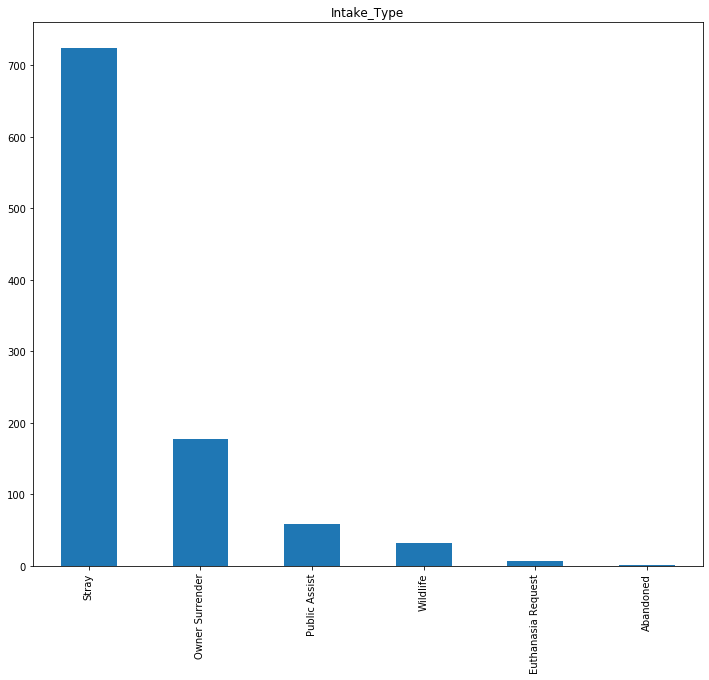

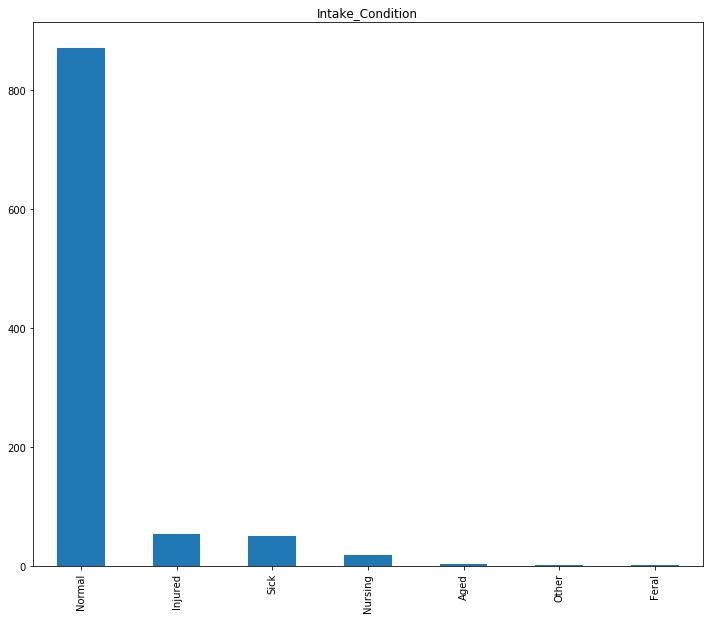

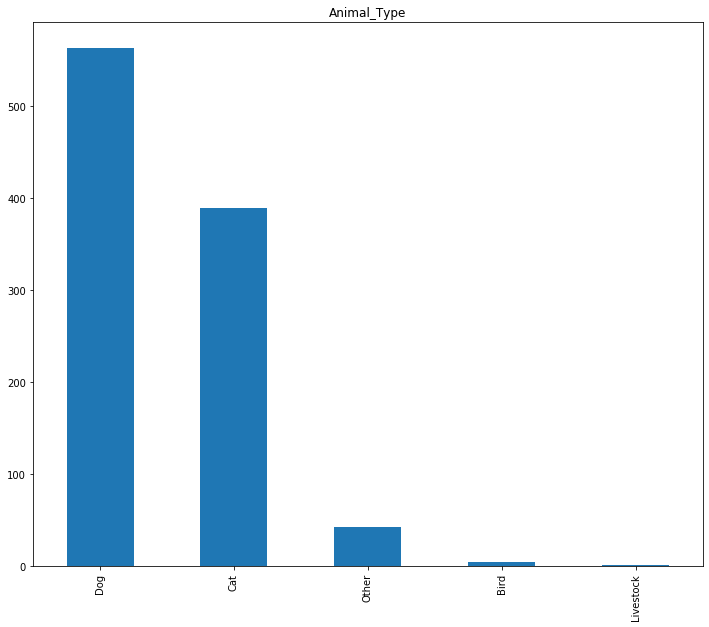

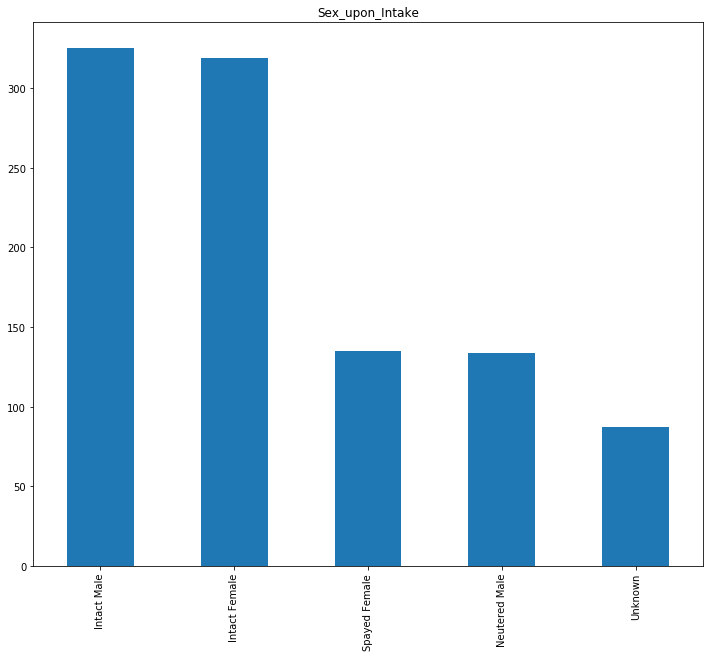

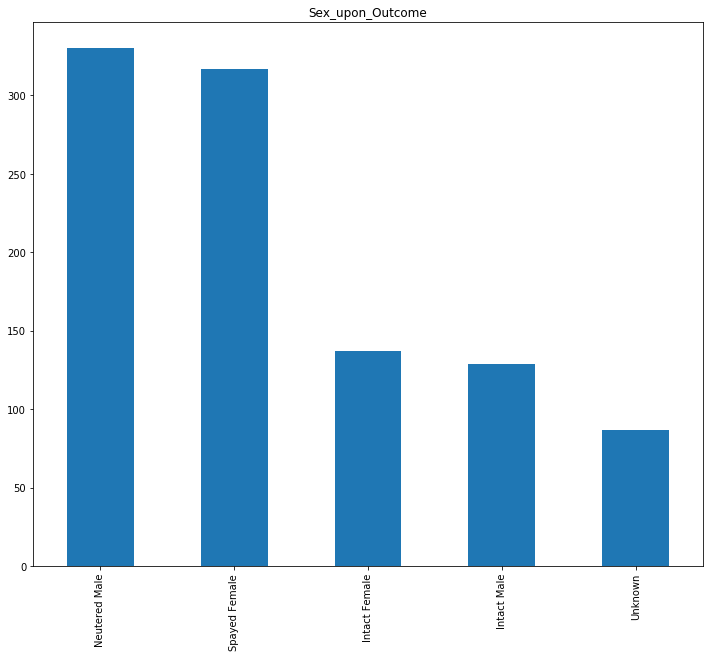

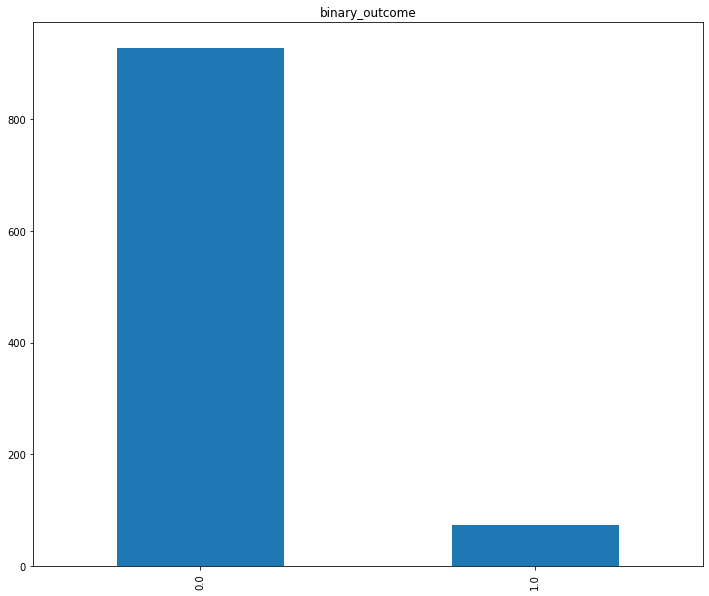

In [162]:
pp = PdfPages('categorical_barcharts_1-1.pdf')

categorical_columns = df[['Intake_Type','Intake_Condition', 'Animal_Type', 'Sex_upon_Intake', 'Sex_upon_Outcome',\
                          'binary_outcome']].columns

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure()) # add chart to pdf file
    plt.show()

The *Name* feature has a cardinality of 588 unique names. Represented on a bar chart, this would have too many values and would not be a meaningful visualisation. We could visualise the names that were given most frequently, however this does not really carry any meaning for our outcome so I will plot here a visualisation of whether an animal was named or not.

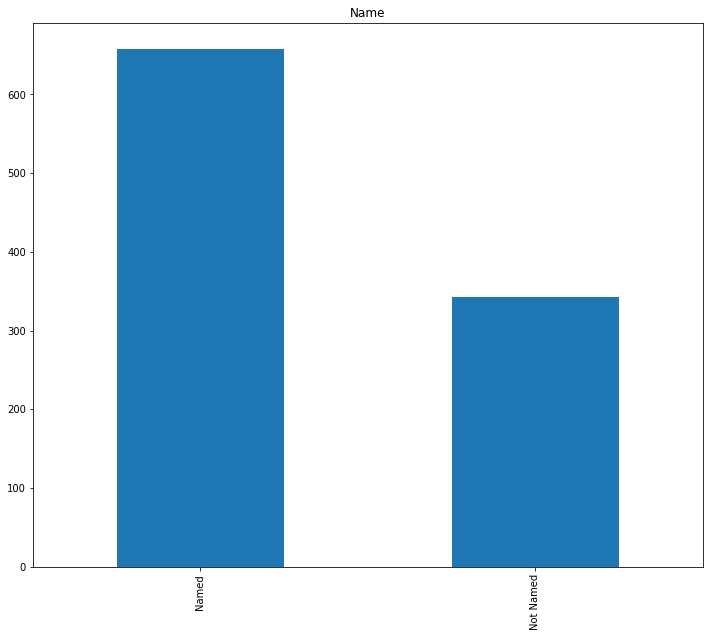

In [163]:
# Plotting the barchart for feature Name

df_name = df[['Animal_ID','Name']]
df_name['Name'] = df.apply(lambda row: "Not Named" if pd.isna(row['Name']) == True else "Named", axis=1)

f = df_name['Name'].value_counts().plot(kind='bar', title='Name', figsize=(12,10))
pp.savefig(f.get_figure())
plt.show()

plt.close('all')

The *Found_Location* feature has a very high cardinality and individual addresses do not carry much meaning. As a result, I will create a bar chart here that helps visualise the locations that more than one animal came from. All other locations (where only one animal was found) are grouped into an 'Other' bar.

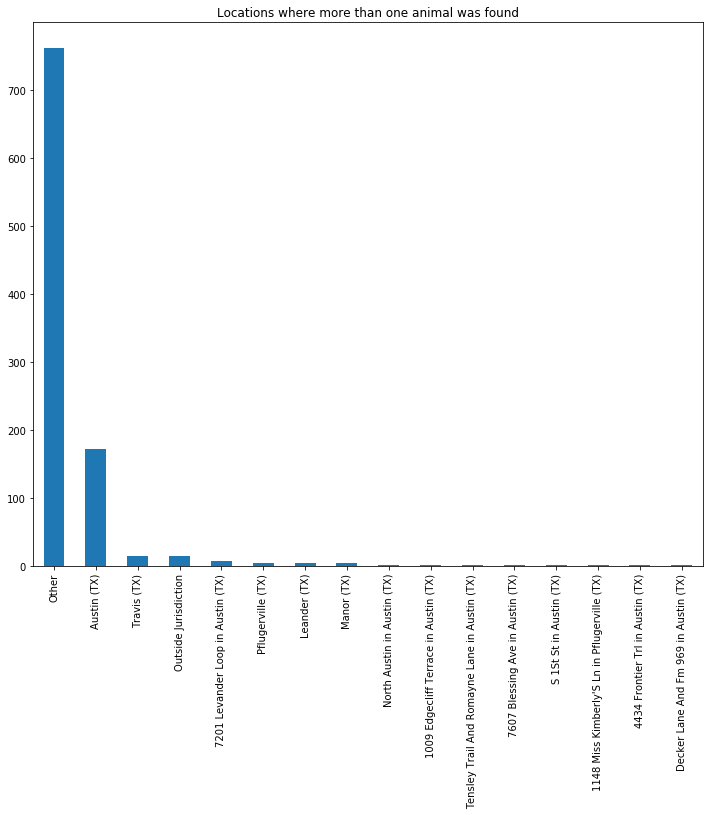

In [164]:
# Plotting bar chart for Found_Location

df_found = df.groupby('Found_Location').filter(lambda x: len(x) > 1)
frequent_found = df_found.Found_Location.unique()

df_fl = df[['Animal_ID','Found_Location']]

df_fl['Found_Location'] = df.apply(lambda row: row['Found_Location'] if row['Found_Location'] in frequent_found \
                                   else "Other", axis=1)


f = df_fl['Found_Location'].value_counts().plot(kind='bar', \
                                                title='Locations where more than one animal was found',\
                                                figsize=(12,10))


pp.savefig(f.get_figure())
plt.show()


We can see from the bar chart that some cities or towns are more represented. Individual addresses in Austin for example could be grouped into an 'Austin(TX)' category. This could help solve the issue of high cardinality in this feature and will be addressed in the Data Quality Plan.

The *Breed* feature has a very high cardinality and can be split by each of the 5 Animal Types to be visualised more easily.

In [165]:
animal_types = df.Animal_Type.unique()
animal_types

[Cat, Dog, Other, Bird, Livestock]
Categories (5, object): [Cat, Dog, Other, Bird, Livestock]

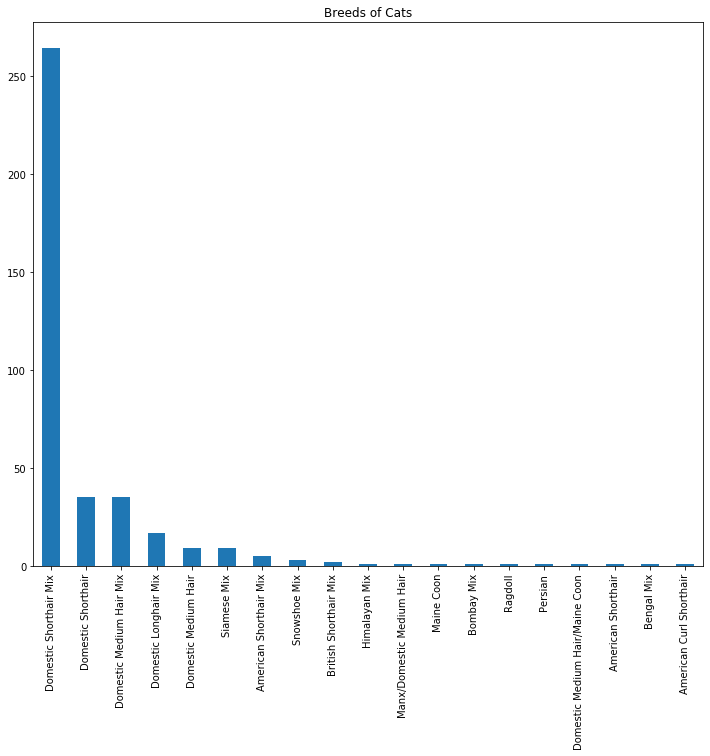

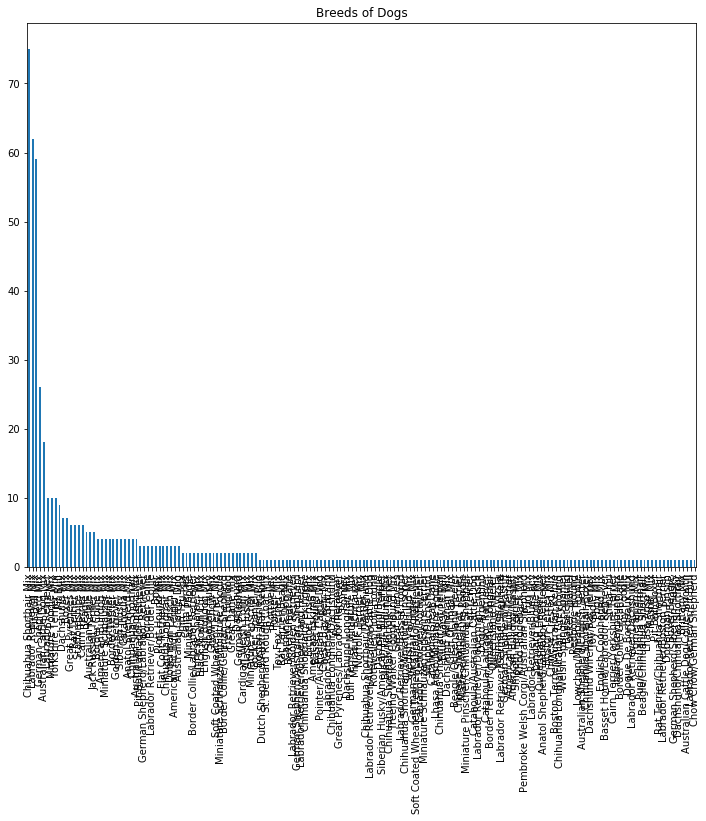

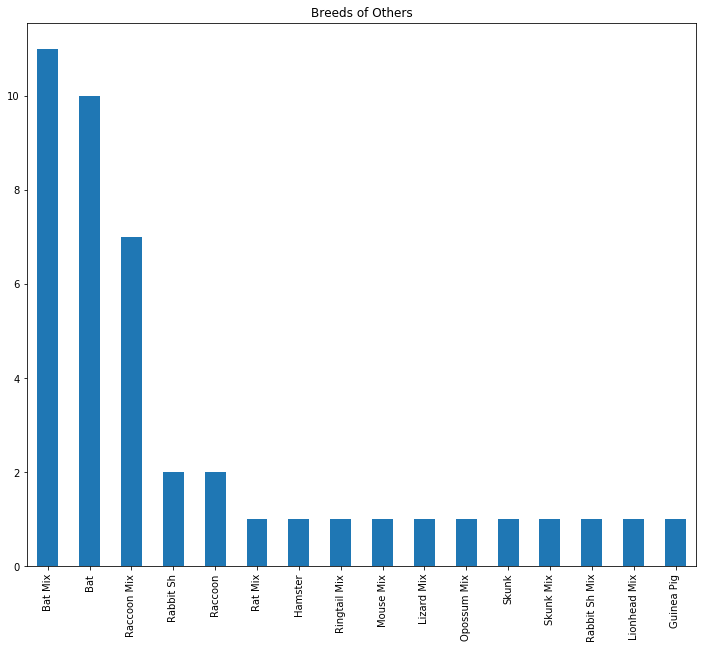

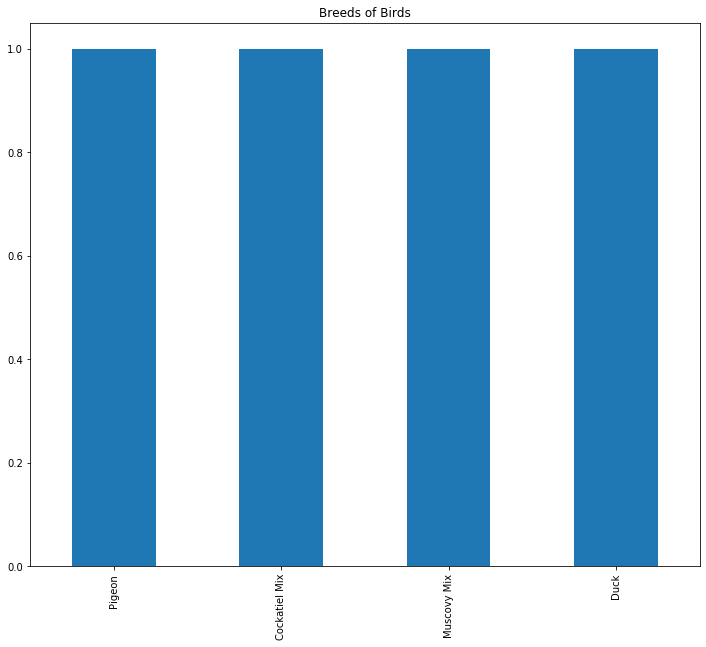

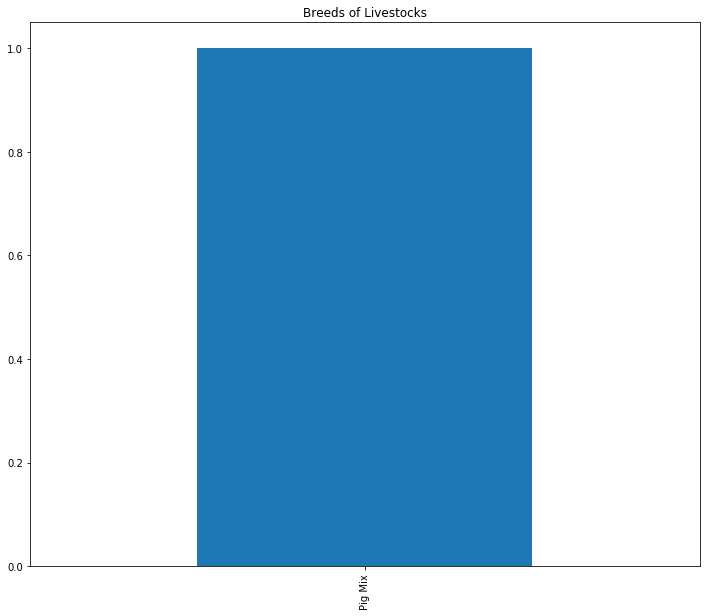

In [166]:
df['Breed'] = df['Breed'].astype(object) # necessary to prevent a bug

for animal in animal_types:
    filtered_df = df[df['Animal_Type'] == animal]
    f = filtered_df['Breed'].value_counts().plot(kind='bar', title="Breeds of {}s" .format(animal), figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()


From the *breeds of cats* bar chart, we can see that:

- the vast majority of cats in the Animal Center are non-pedigree cats
- there is some duplication of breeds e.g. Domestic Shorthair and Domestic Shorthair mix can be considered the same as by definition, the DSH breed of cat is a mix or absence of pedigree/specific breed.

From the *breeds of others* bar chart, we can see that:
- the breeds indicated here are actually animal types (species) rather than breeds.
- there is unnecessary duplication of values. For example, Bat and Bat Mix should be just one value, as bat is a species and don't get mixed with any other species. Teh same goes for other wild animal types like Skunk or Opossum.
In addition, Lionhead is a breed of longhaired rabbit (https://en.wikipedia.org/wiki/Lionhead_rabbit)

From the *breeds of birds* bar chart, we can see that:
- There were only 4 types of birds taken in, and only one of each type of bird.
- There are no particular data quality issues to note for birds

From the *breeds of livestock* bar chart, we can see that there was only animal of livestock type and that it was a pig, which a species rather than a breed. We could possibly replace animal type 'Livestock' by 'Pig'.

The *Breed* feature still has a very high cardinality for the *Dog* animal type, so it would help to visualise only the breeds that relate to more than one dog.

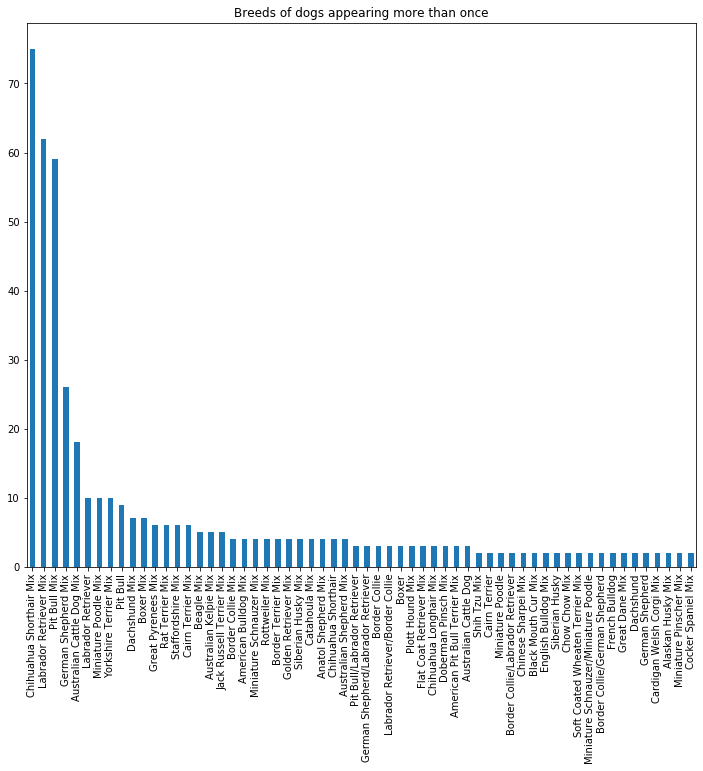

In [167]:
df_dog = df[df['Animal_Type'] == 'Dog']

f = df_dog.Breed.value_counts().loc[lambda x: x>1].plot(kind='bar',figsize=(12,10), \
                                                    title='Breeds of dogs appearing more than once')

# I figured out the code above with the help of 
# https://stackoverflow.com/questions/22320356/pandas-get-values-from-column-that-appear-more-than-x-times

pp.savefig(f.get_figure())
plt.show()

The *Color* feature also has a very high cardinality. I will adopt the same principle and visualise only the colors that appear more than once in the dataset.

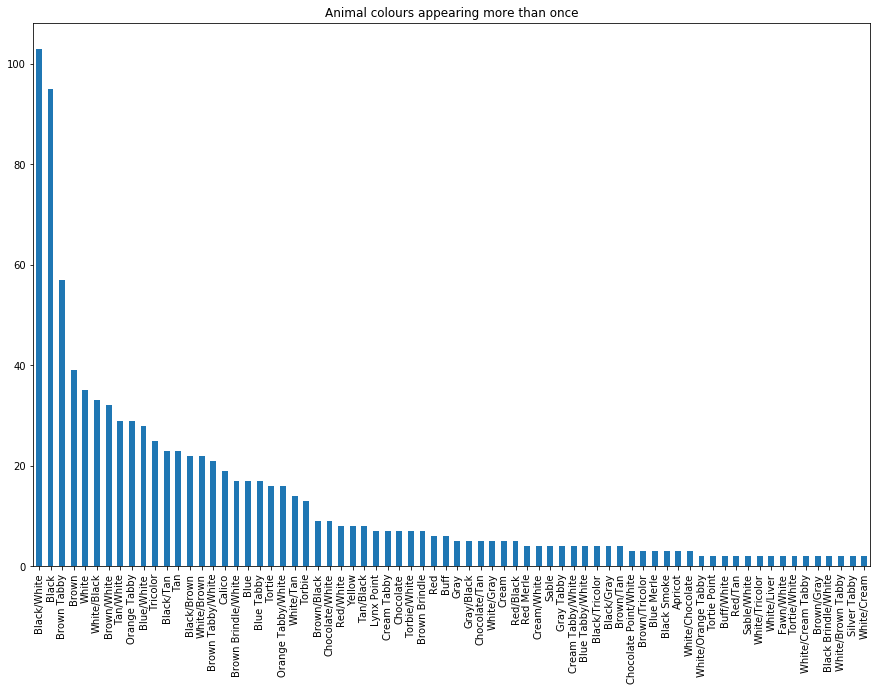

In [168]:
f = df.Color.value_counts().loc[lambda x: x>1].plot(kind='bar',figsize=(15,10), \
                                                    title='Animal colours appearing more than once')

pp.savefig(f.get_figure())
plt.show()

pp.close()

In [169]:
print("Number of distinct colours appearing only once in the dataset:")
print(df.Color.value_counts().loc[lambda x: x==1].sum())

df_rare_colour = df.groupby('Color').filter(lambda x: len(x) == 1)
rare_colours = df_rare_colour.Color.unique()
for colour in rare_colours:
    print(colour)

Number of distinct colours appearing only once in the dataset:
52
Black Tabby/White
Brown Tabby/Black
Tricolor/Brown
Gray/Gray
Tan/Tricolor
Tan/Brown
Tricolor/White
Black/Silver
Cream/Tan
Seal Point
Yellow/White
Yellow Brindle/White
Gold
Lilac Point
Red Merle/White
Green
White/Red Merle
Tricolor/Cream
Yellow/Black
Fawn
Black Tabby
Tan/Yellow Brindle
Calico/Tricolor
Flame Point
Blue/Gray
Gray Tabby/White
Black Brindle
Brown Brindle/Black
White/Yellow
Black/Blue Tick
Brown/Red Tick
Blue Smoke
Fawn/Brown Brindle
Silver Tabby/White
Fawn/Black
Blue/Tortie
Calico/White
White/Agouti
Black/Cream
Black/Tortie
Sable/Brown
Orange/White
Red/Brown
Black/Orange
White/Buff
White/Orange
Chocolate Point
White/White
Sable/Tan
White/Green
Tan/Silver
Brown Merle/White


From this visualisation and the list above, we can see that there is some duplication of colours, for example:

- Black/White and White/Black should be just one value instead of two distinct ones.
- Torbie is the same as Torbie/White (https://petful101.com/cat/what-is-a-torbie-cat)

### Visualisations for Continuous features

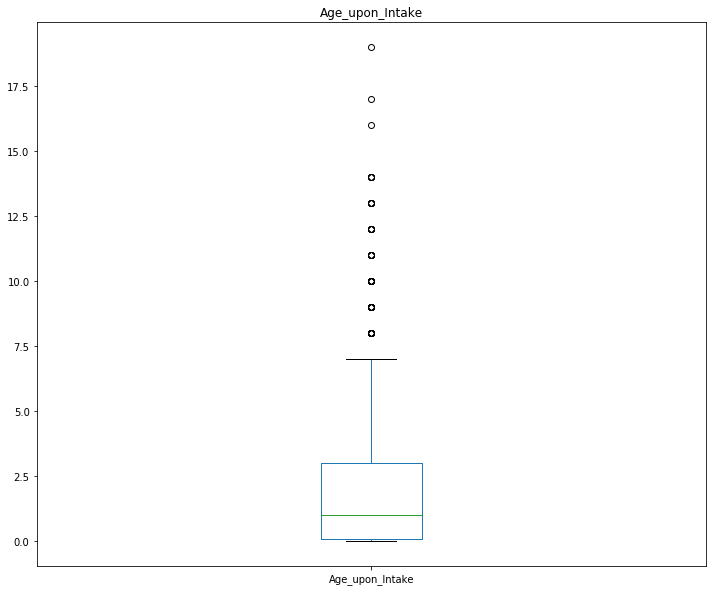

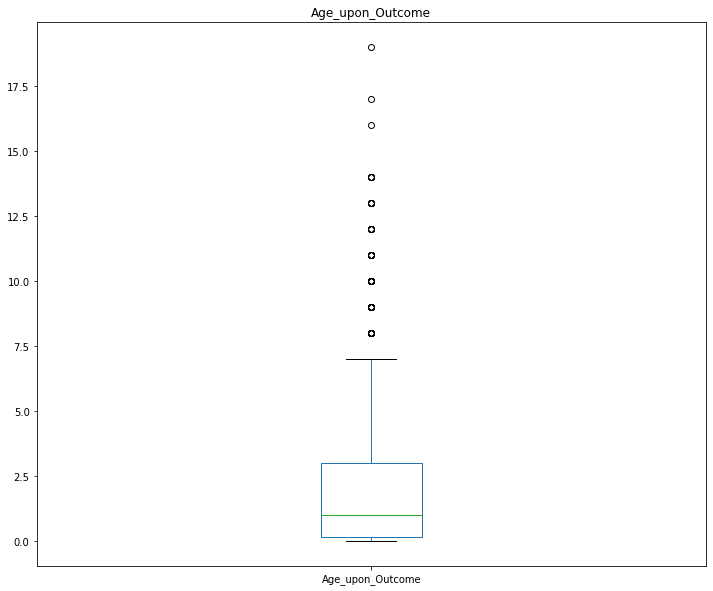

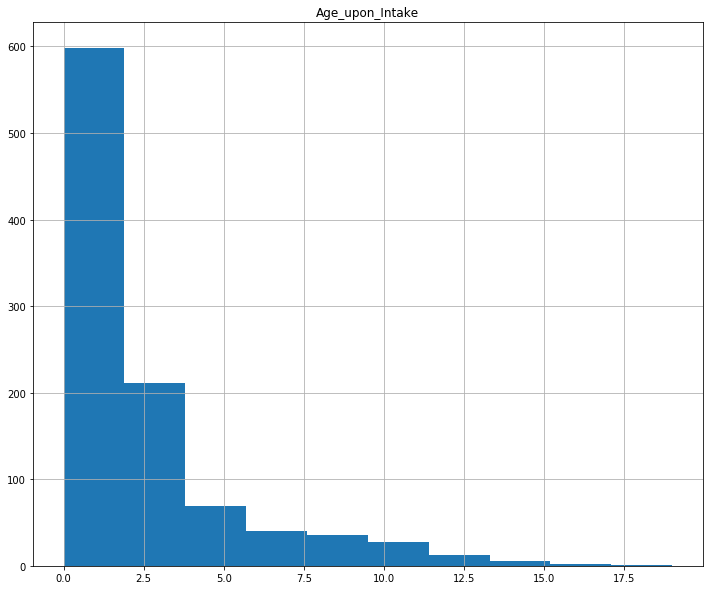

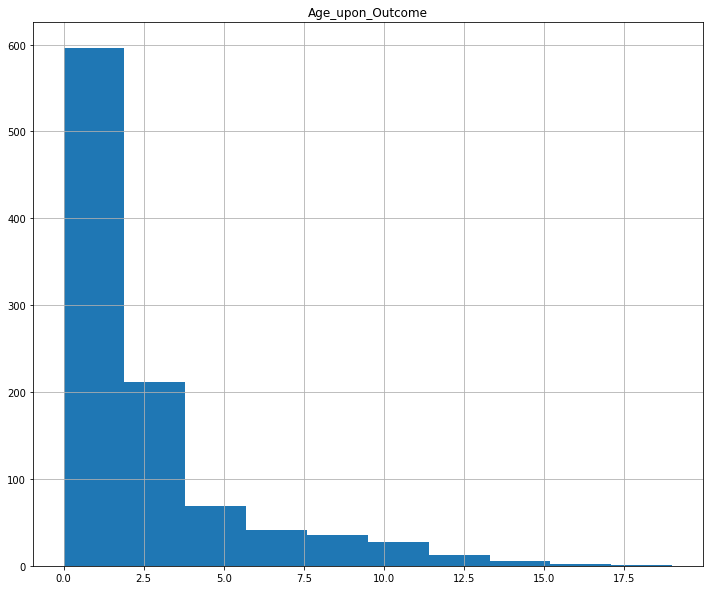

In [170]:
pp = PdfPages('continuous_boxplots_1-1.pdf')

continuous_columns = df[['Age_upon_Intake', 'Age_upon_Outcome']].columns

for column in continuous_columns:
        # Box plots
        f_box = df[column].plot(kind='box', title=column, figsize=(12,10))
        pp.savefig(f_box.get_figure())
        plt.show()
        
pp.close()

pp = PdfPages('continuous_histograms_1-1.pdf')

for column in continuous_columns:
        # Histograms
        plt.figure()
        f_hist = df[column].hist(figsize=(12,10))
        plt.title(column)
        pp.savefig(f_hist.get_figure())
        plt.show()

pp.close()

plt.close('all')

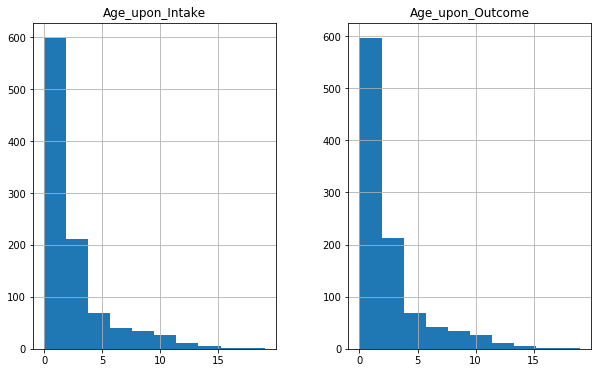

In [171]:
# save histograms as png for Data Quality Report
df[continuous_columns].hist(layout=(1, 2), figsize=(10,6), bins=10)
plt.savefig('continuous_histograms.png')

Observations:
- there is a high concentration of ages between 0 and 2.5 years, both on intake and on outcome.
- There are a number of outliers in the box plots. However, they are relevant to our purpose and should be kept.
- The distribution of ages looks exponential (or heavily skewed right), with the frequency diminishing as the age grows. The number of animals of a certain age is inversely proportional to the age of the animals.

### Visualisations for the date datatype features

There are several options for visualising the date datatype features:

1. Visualise as a time series to see date patterns in the number of animals arriving at the Animal Center.
2. Ignore year and group by month to visualise animal intake volume by month
3. Group by days of the week

Grouping by month or day of the week may help identify patterns or irregularities in the data. 

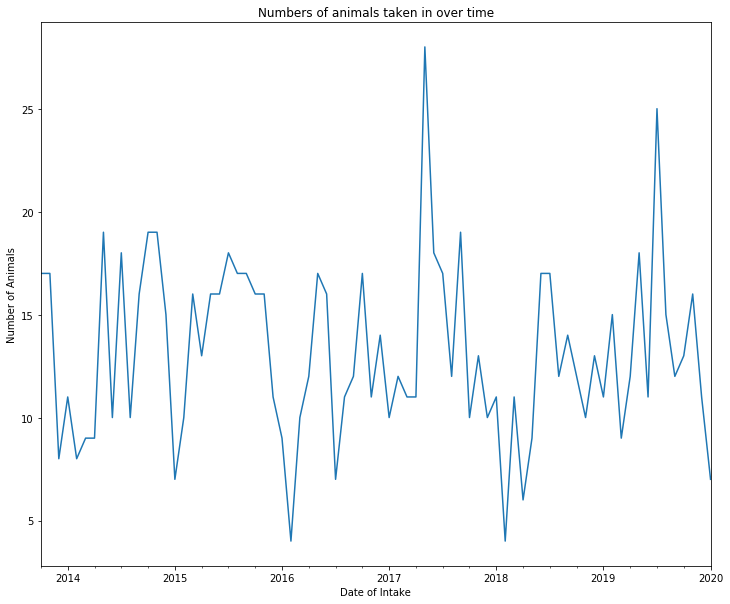

In [172]:
pp = PdfPages('datetime_visualisations.pdf')

# visualise as time series with intake numbers aggregated over each month
df1 = df[['Animal_ID', 'DateTime_Intake']]
df1.index = df1['DateTime_Intake']
# with help from https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/
ax = df1.resample('M').Animal_ID.count().plot(figsize=(12,10), title='Numbers of animals taken in over time')
ax.set_xlabel('Date of Intake')
ax.set_ylabel('Number of Animals')
plt.savefig('DateTime_Intake.png')
pp.savefig()
plt.show()

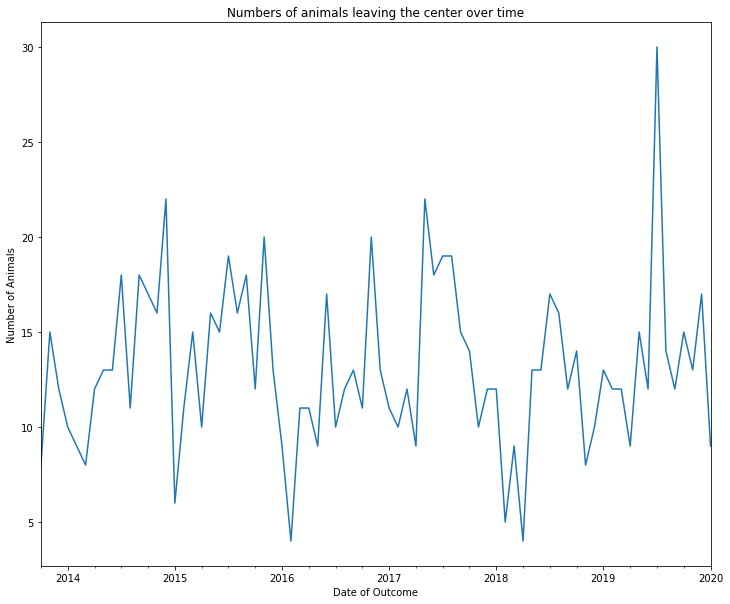

In [173]:
# visualise as time series with outcome numbers aggregated over each month
df1 = df[['Animal_ID', 'DateTime_Outcome']]
df1.index = df1['DateTime_Outcome']

ax = df1.resample('M').Animal_ID.count().plot(figsize=(12,10), title='Numbers of animals leaving the center \
over time')
ax.set_xlabel('Date of Outcome')
ax.set_ylabel('Number of Animals')
plt.savefig('DateTime_Outcome.png')
pp.savefig()
plt.show()

There are no clear seasonal trends to note on these plots. This probably makes it difficult for the animal Center to anticipate how many animals they will have to deal with in any given season and we cannot derive any particular insights from these plots.

There was a noticeable peak in intakes in the second quarter of 2017. We could investigate later if this peak in intake correlates with a rise in negative outcomes (to test if shelter overcrowding perhaps leads to more negative outcomes).

*NB: It does not make sense to plot the date_of_birth feature as a time series. It will be looked at using bar charts below.*

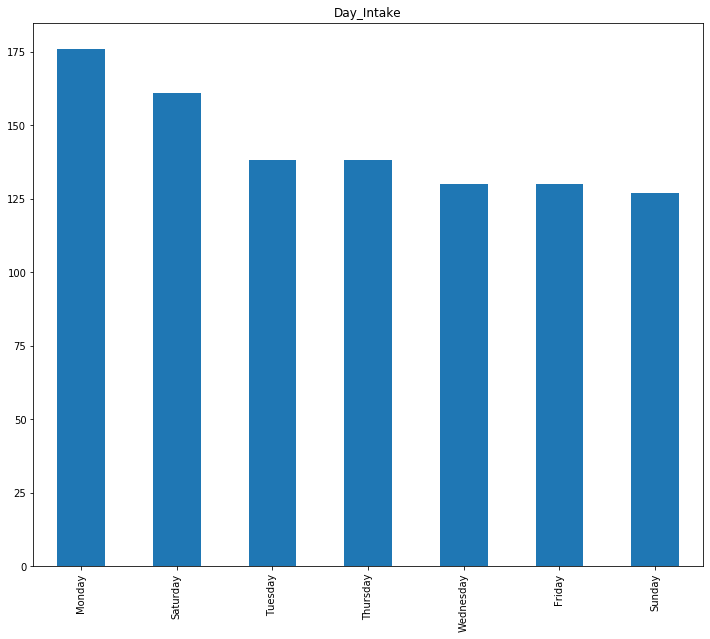

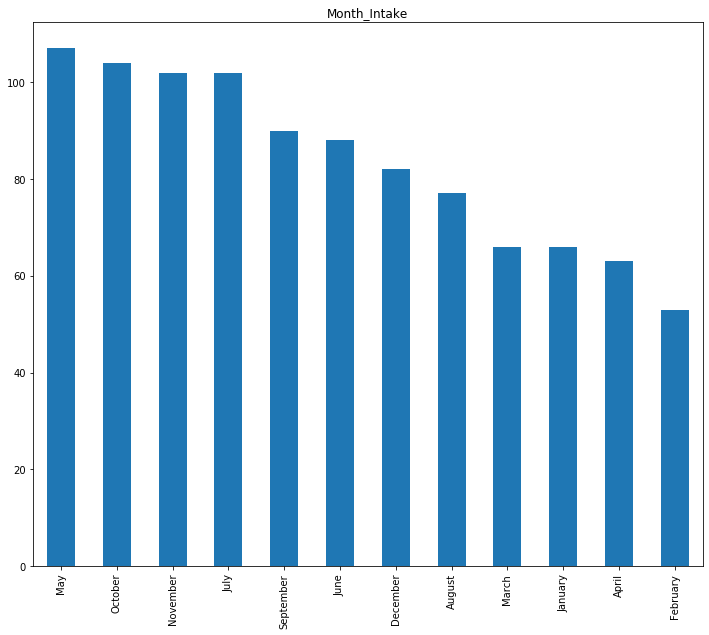

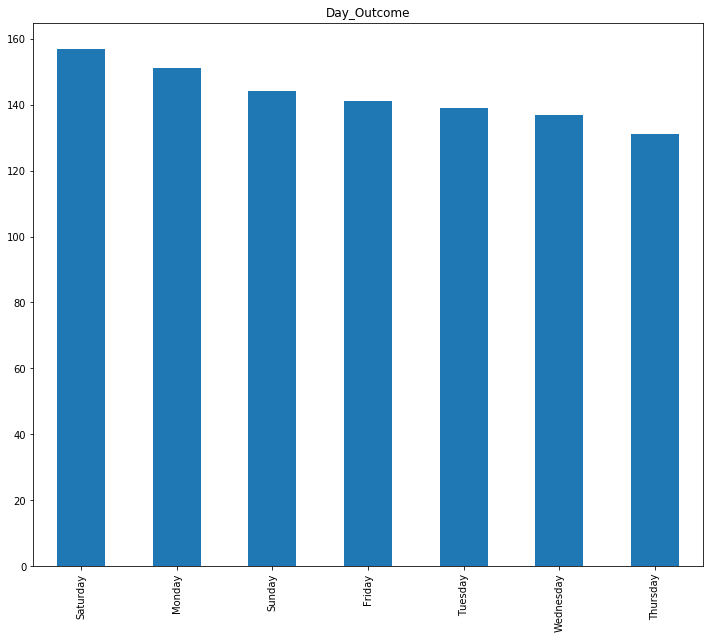

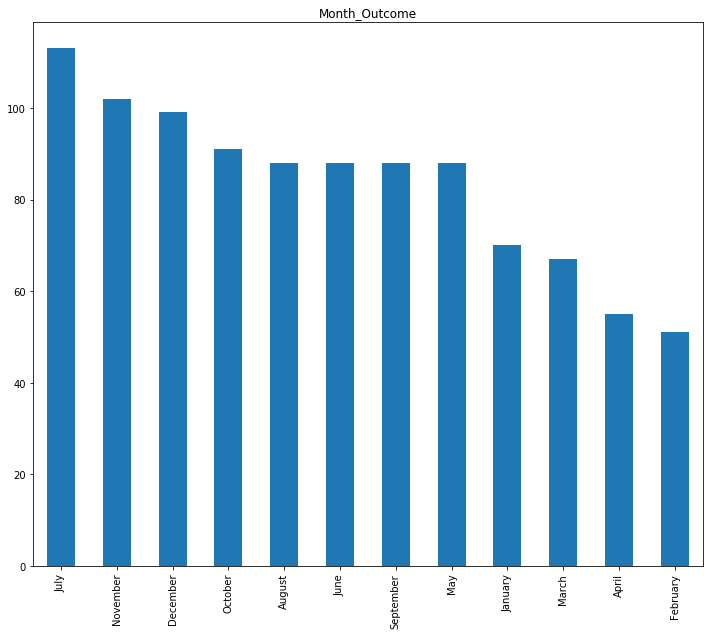

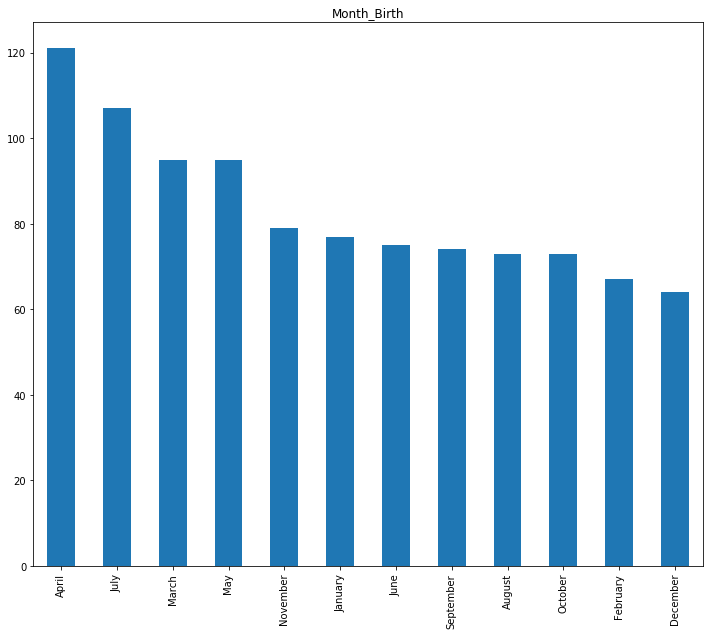

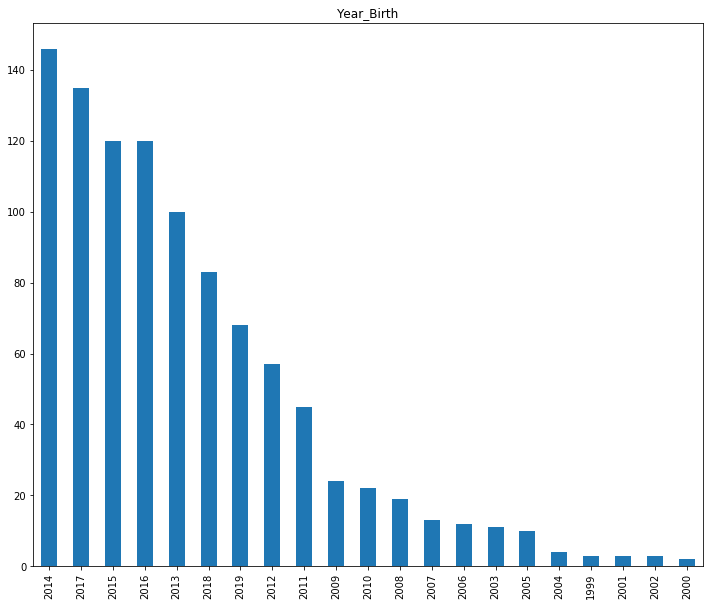

In [174]:
# Plot by day of the week and month

import datetime as dt
import calendar

df['Day_Intake'] = df['DateTime_Intake'].dt.weekday_name
df['Month_Intake'] = df.DateTime_Intake.apply(lambda x: x.strftime("%B"))

df['Day_Outcome'] = df['DateTime_Outcome'].dt.weekday_name
df['Month_Outcome'] = df.DateTime_Outcome.apply(lambda x: x.strftime("%B"))

df['Month_Birth'] = df.Date_of_Birth.apply(lambda x: x.strftime("%B"))
df['Year_Birth'] = df.Date_of_Birth.apply(lambda x: x.strftime("%Y"))

date_columns = ['Day_Intake', 'Month_Intake', 'Day_Outcome', 'Month_Outcome', 'Month_Birth', 'Year_Birth']

for column in date_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()
    
pp.close()


Observations:

- Mondays and Saturdays have the highest intakes of animals
- I expected January to be one of the busiest months for intakes (due to unwanted pets received as Christmas presents) but this is not the case. The busiest months for intakes are May, October, November and July.
- Just over half of the animals were born between 2014 and 2017.

### Checking the logical integrity of the data

A number of features can be cross-referenced to check for logical integrity and detect any inconsistencies

#### Date of Birth

As many of the animals taken in are strays, it seems unlikely that an accurate date of birth can be logged for each animal that arrives at the Animal Center. Using the age feature, we can cross-reference and see if the date of birth makes logical sense.

First, we check that the date of intake is greater than or equal to the date of birth of the animal.

In [175]:
# DateTime_Intake should always be >= Date_of_Birth

df['Diff'] = df.DateTime_Intake >= df.Date_of_Birth

df[df['Diff'] == False][['Animal_ID', 'DateTime_Intake', 'Date_of_Birth']]

,Animal_ID,DateTime_Intake,Date_of_Birth
163,A678667,2014-05-11 14:46:00,2014-06-08
400,A677819,2014-03-29 13:08:00,2014-04-29
637,A731579,2016-07-23 12:20:00,2016-07-24


We have 3 records with nonsensical dates of birth. This data quality issue will be addressed in the Data Quality Plan.

We can also check that the values for the Age_upon_Intake feature are close to the diference between Date_of_Birth and Date_of_Intake.

The calculations will not be exact (due to leap years and rounding) but values close enough will indicate quality of the data. The test is based on an acceptable error of 1 week.

In [176]:
# Age should be matching the difference between Date_of_Birth and DateTime_Intake

df['Derived_Age'] = df.DateTime_Intake - df.Date_of_Birth # this will give use a timedelta result

# Converting timedelta into a value in years to allow comparison with Age_upon_Intake feature
df['Derived_Age'] = df.Derived_Age.apply(lambda x: x.days/365)

acceptable_error =1/52

df['Age_Test'] = (df['Derived_Age'] - df['Age_upon_Intake']) < acceptable_error

df[df.Age_Test == False][['Derived_Age','Age_upon_Intake']]

,Derived_Age,Age_upon_Intake
0,0.293151,0.250000
5,0.142466,0.083333
8,0.167123,0.083333
10,0.142466,0.083333
17,0.230137,0.166667
...,...,...
983,0.167123,0.083333
984,3.490411,3.000000
987,4.693151,4.000000
989,0.369863,0.333333


There are 372 rows with a difference of more than a week between the Age_upon_Intake and the age derived from Date_of_Birth and DateTime_Intake.

As the Age_upon_Intake was initially entered as a string, it is less precise. For example, someone would have entered 1 year or 2 years, rather than '1 and a half years'. However, given the circumstances in which animals arrive at an Animal Center, I believe this estimated age is more meaningful than a precise date of birth that must have been made up in any case of stray animals, unless they arrived shortly after birth. 

An estimated age is also more relevant to the binary outcome, and will make it easier for the ML model to later derive general rules, rather than using overly precise (but not necessarily accurate) dates of birth.

This issue will be addressed in the Data Quality Plan.

In [177]:
df[(df.Age_Test == False) & (df.Intake_Type == 'Owner Surrender')][['Derived_Age','Age_upon_Intake']]

,Derived_Age,Age_upon_Intake
10,0.142466,0.083333
19,13.041096,13.000000
31,11.824658,11.000000
34,0.164384,0.083333
50,0.126027,0.083333
...,...,...
923,2.706849,2.000000
940,9.501370,9.000000
953,1.471233,1.000000
961,3.572603,3.000000


In cases where the Intake_Type is 'Owner Surrender' we could expect that the dates of birth are accurate. The above shows that there are differences of more than 1 week in 92 cases. How to deal with these will be addressed in the Data Quality Plan.

**DateTime_Outcome and DateTime_Intake**

The outcome date should always be later than or equal to the intake date

In [178]:
# DateTime_Intake should always be >= Date_of_Birth

df['Time_Diff'] = df.DateTime_Outcome >= df.DateTime_Intake

count = df[df['Time_Diff'] == False].Animal_ID.count()
print("There are {} records with contradicting outcome and intake dates" .format(count))

df[df['Time_Diff'] == False][['Animal_ID', 'DateTime_Intake', 'DateTime_Outcome', 'Age_upon_Intake',\
                              'Age_upon_Outcome']]

There are 18 records with contradicting outcome and intake dates


,Animal_ID,DateTime_Intake,DateTime_Outcome,Age_upon_Intake,Age_upon_Outcome
31,A556804,2013-11-30 12:19:00,2013-11-16 16:38:00,11.000000,11.000000
51,A708359,2016-12-15 18:36:00,2015-07-30 15:56:00,1.000000,0.500000
76,A724169,2019-12-09 14:18:00,2017-05-30 13:08:00,5.000000,3.000000
143,A717409,2015-12-30 11:09:00,2015-12-19 18:18:00,9.000000,9.000000
199,A728707,2016-12-09 09:44:00,2016-06-11 18:17:00,0.666667,0.166667
320,A759270,2017-09-29 18:00:00,2017-09-29 00:00:00,0.076923,0.076923
364,A772138,2018-12-04 16:12:00,2018-05-16 19:06:00,0.916667,0.333333
384,A773965,2018-06-08 11:36:00,2018-06-08 00:00:00,0.057692,0.057692
424,A798563,2019-06-27 14:44:00,2019-06-27 00:00:00,0.083333,0.083333
434,A695717,2017-04-29 14:53:00,2015-08-31 18:48:00,3.000000,1.000000


#### Age_upon_Intake and Age_upon_Outcome

The value for Age_upon_Outcome should always be greater than or equal to Age_upon_Intake

In [179]:
df['Age_Check'] = (df.Age_upon_Outcome - df.Age_upon_Intake) >= 0 

df[df.Age_Check == False].Animal_ID.count()


8

There are 8 rows with invalid Age combinations. We can look at them more closely in combination with the derived age from the previous check and the Intake_Type (which should help assess accuracy of different values).

In [180]:
df[df.Age_Check == False][['Age_upon_Outcome', 'Age_upon_Intake', 'Derived_Age', 'Intake_Type']]

,Age_upon_Outcome,Age_upon_Intake,Derived_Age,Intake_Type
51,0.500000,1.000000,1.887671,Stray
76,3.000000,5.000000,5.660274,Public Assist
199,0.166667,0.666667,0.715068,Owner Surrender
364,0.333333,0.916667,0.969863,Stray
434,1.000000,3.000000,3.271233,Public Assist
504,1.000000,3.000000,3.663014,Owner Surrender
654,0.250000,2.000000,2.443836,Owner Surrender
774,0.083333,0.096154,0.095890,Stray


These issues will be addressed in the Data Quality Plan.

#### Intake_Type

The Intake_Type can be checked against values for Animal_Types, as certain value combinations would incorrect (e.g. an Intake_Type of Wildlife with an Animal_Type of Dog)

In [181]:
# Checking for Wildlife that's not 'Other' Animal_Type
df['Type_Check_1'] = df.apply(lambda row: False if row['Intake_Type'] == 'Wildlife' and \
                              row['Animal_Type'] != 'Other' else True, axis=1)

df[df.Type_Check_1 == False].Animal_ID.count()

0

No issues identified with Intake_Type.

#### Sex_upon_Income vs Sex_upon_Outcome

Some values can be cross-checked. For example, we would not expect an animal to come in as 'Spayed' and leave as 'Intact'

In [182]:
df['Sex_Check_1'] = df.apply(lambda row: False if row['Sex_upon_Intake'] == 'Spayed Female' and \
                              row['Sex_upon_Outcome'] != 'Spayed Female' else True, axis=1)

df['Sex_Check_2'] = df.apply(lambda row: False if row['Sex_upon_Intake'] == 'Neutered Male' and \
                              row['Sex_upon_Outcome'] != 'Neutered Male' else True, axis=1)

df['Sex_Check_3'] = df.apply(lambda row: False if row['Sex_upon_Intake'] == 'Unknown' and \
                              row['Sex_upon_Outcome'] != 'Unknown' else True, axis=1)

df[(df.Sex_Check_1 == False) | (df.Sex_Check_2 == False) | (df.Sex_Check_3 == False)].Animal_ID.count()

0

No issues identified with Sex_upon_Intake and Sex_upon_Outcome

In [183]:
# Drop columns added earlier for quality checks

df.drop(columns=['Day_Intake', 'Month_Intake', 'Day_Outcome', 'Month_Outcome', 'Month_Birth', 'Diff', 'Derived_Age', \
                'Age_Test', 'Time_Diff', 'Age_Check', 'Type_Check_1', 'Sex_Check_1', 'Sex_Check_2', 'Sex_Check_3'],\
       inplace=True)
df.columns

Index(['Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location', 'Intake_Type',
       'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake', 'Age_upon_Intake',
       'Breed', 'Color', 'DateTime_Outcome', 'Date_of_Birth',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'binary_outcome', 'Year_Birth'],
      dtype='object')

# 2. Preparing the Data Quality Plan

In [184]:
# Load the cleaned dataset
df = pd.read_csv('AnimalWelfareRisk_postDQR.csv')

## List of issues to be addressed (as identified in the Data Quality Report)

**1. High cardinality of Name**

The names themselves do not carry any meaning for the target outcome. However, the fact whether an animal is named or not could potentially impact the outcome, for example if they are better cared for at the center due to having a name (unconscious bias from the care staff).

**2. High cardinality in Found_Location, with varying levels of details in the address**

We can see from the bar chart that some cities or towns are more represented. Individual addresses in Austin for example could be grouped into and 'Austin(TX)' category. This could help solve the issue of high cardinality in this feature and will be addressed in the Data Quality Plan.

**3. Some values in the Breed feature are actually species or animal types rather than breeds and are also duplicated**

These values could be more significant if they were to replace ‘Other’ in Animal Type.

**4. Duplication of cat breeds**

Some of the cat breeds are duplicated and can be grouped to reduce the cardinality of the Breed feature.

**5. High cardinality of Breed feature.**

The high cardinality will make it difficult to derive any generalised insights from this feature.

**6. High cardinality of the colours**

While most of the colours are accurate distinct values, the high cardinality will make it difficult to derive any generalised insights from this feature. 

**7. Possible missing values for Age_upon_Intake and Age_upon_Outcome**

7 animals have an intake age of 0 years and 2 animals have an outcome age of 0 years. However this could be legitimate and needs to be investigated further by cross-checking with other features.


**8. Conflicting DateTime_Outcome and DateTime_Intake**

18 records have a DateTime_Intake that is later than the DateTime_Outcome

**9. Invalid Age_upon_Intake for 8 records**

8 animals have an Age_upon_Intake that is greater than their Age_upon_Outcome

**10. 3 DateTime_Outcome values and 6 DateTime_Intake values are not unique**

These may be legitimate values but must be investigated further to confirm.

**11. There are 126 non-unique Date_of_Birth values, which seems unlikely and needs to be investigated**

**12. Date_of_Birth is nonsensical for 3 rows (Date_of_Birth is later than DateTime_Intake)**

**13. 372 rows with a difference of more than a week between the Age_upon_Intake and the age derived from Date_of_Birth and DateTime_Intake.**

As the Age_upon_Intake was initially entered as a string, it is less precise. However, given the circumstances in which animals arrive at an Animal Center, this estimated age is likely more meaningful than a precise date of birth in any case of stray animals, unless they arrived shortly after birth. 

**14. In cases where the Intake_Type is 'Owner Surrender' we could have expected that the dates of birth were more accurate. Instead, the investigation found differences of more than 1 week in 92 cases.**


## Discussion and implementation of solutions

**1. High cardinality of Name**

The data itself is accurate so this is not technically a data quality issue. This can be left as is for now and can be transformed into a binary value later in the process.

**2. High cardinality in Found_Location, with varying levels of details in the address**

One solution that may carry meaning for the future ML model would be to identify different types of addresses where exact street numbers and street names are indicated. These could be grouped into countryside vs. city addresses for example, to see if different types of locations have an impact of the outcome for the animal. However, this would be a very time consuming process as each addresses would have to be investigated. This level of detail is also not available for all the rows and therefore modifiying the data in such a way may introduce bias.

The simpler solution chosen is to strip the detailed addresses to leave only the City detail. (e.g. Austin (TX))

In [185]:
# split values by space and keep the last 2 elements 

split_var = df.Found_Location.str.split(" ")
df['Found_Location'] = split_var.str.get(-2) + " " + split_var.str.get(-1)

# check the new list of values
df['Found_Location'].unique()

array(['Austin (TX)', 'Travis (TX)', 'Outside Jurisdiction',
       'Pflugerville (TX)', 'Manor (TX)', 'Hills (TX)', 'Valle (TX)',
       'Leander (TX)', 'Lakeway (TX)', 'Park (TX)', 'Vista (TX)',
       'Rock (TX)', 'Ridge (TX)', 'Creedmoor (TX)', 'Cave (TX)',
       'Bastrop (TX)'], dtype=object)

**3. Some values in the Breed feature are actually species or animal types rather than breeds and are also duplicated**

- The duplicate breeds for an Animal_Type of 'Other' should be grouped as they are nonsensical (e.g.there cannot be a *bat mix*, so *bat* and *bat mix* mean the same thing and should be represented by *bat*)

- The value in the Breed should then replace the value 'Other' in Animal_Type to provide more detail in Animal_Type. Although this adds to the cardinality, I believe it is manageable, and is consistent with other values given that there is already an Animal_Type of 'Bird' for only 4 birds.

- The values in Breed for those animals will be replaced by 'Other'. Otherwise we would have duplication of the value and this will also help reduce the cardinality of the Breed feature.

In [186]:
# Get the list of values
print("List of unique breeds for animal type 'Other':")
print(df[df.Animal_Type == 'Other'].Breed.unique())
print()

# Remove reference to Mix
df['Breed'] = df.apply(lambda row: row['Breed'].replace(' Mix','') if row['Animal_Type'] == 'Other' \
                       else row['Breed'], axis=1)

# Check new list of values
other_breeds = df[df.Animal_Type == 'Other'].Breed.unique()
print(other_breeds)

# Check other values unaffected
df.Breed.nunique()

List of unique breeds for animal type 'Other':
['Bat' 'Guinea Pig' 'Raccoon' 'Opossum Mix' 'Bat Mix' 'Raccoon Mix'
 'Rabbit Sh' 'Hamster' 'Lizard Mix' 'Skunk Mix' 'Rabbit Sh Mix'
 'Ringtail Mix' 'Rat Mix' 'Mouse Mix' 'Skunk' 'Lionhead Mix']

['Bat' 'Guinea Pig' 'Raccoon' 'Opossum' 'Rabbit Sh' 'Hamster' 'Lizard'
 'Skunk' 'Ringtail' 'Rat' 'Mouse' 'Lionhead']


210

In [187]:
# Use the value in Breed to replace the 'Other' value in Animal_Type

df['Animal_Type'] = df.apply(lambda row: row['Breed'] if row['Animal_Type'] == 'Other' \
                       else row['Animal_Type'], axis=1)

# Check values in Animal_Type

df['Animal_Type'].unique()

array(['Cat', 'Dog', 'Bat', 'Guinea Pig', 'Raccoon', 'Opossum',
       'Rabbit Sh', 'Hamster', 'Lizard', 'Bird', 'Skunk', 'Ringtail',
       'Rat', 'Mouse', 'Livestock', 'Lionhead'], dtype=object)

In [188]:
# Replace the original Breed in the Breed column by 'Other' to avoid duplication

df['Breed'] = df.apply(lambda row: 'Other' if row['Breed'] in other_breeds else row['Breed'], axis=1)

In [189]:
df.Breed.nunique()

199

**4. Duplication of cat breeds**

Some of the cat breeds are redundant and can be grouped to reduce the cardinality without losing any information. The chosen solution is to identify and replace duplicates and to leave the remaining values as they are.

By definition, a Domestic Shorthair or Domestic Longhair cat is a mix breed without pedigree. *Domestic Longhair Mix* and *Domestic Longhair* are interchangeable, so are *Domestic Shorthair Mix* and *Domestic Shorthair*, as well as *Domestic Medium Hair Mix* and *Domestic Medium Hair*. The *Mix* element in these values will be removed to avoid duplication.

In [190]:
# list out all the cat breeds
df[df.Animal_Type == 'Cat'].groupby('Breed').Animal_ID.count()

Breed
American Curl Shorthair              1
American Shorthair                   1
American Shorthair Mix               5
Bengal Mix                           1
Bombay Mix                           1
British Shorthair Mix                2
Domestic Longhair Mix               17
Domestic Medium Hair                 9
Domestic Medium Hair Mix            35
Domestic Medium Hair/Maine Coon      1
Domestic Shorthair                  35
Domestic Shorthair Mix             264
Himalayan Mix                        1
Maine Coon                           1
Manx/Domestic Medium Hair            1
Persian                              1
Ragdoll                              1
Siamese Mix                          9
Snowshoe Mix                         3
Name: Animal_ID, dtype: int64

In [191]:
breeds_to_trim = ['Domestic Longhair Mix', 'Domestic Medium Hair Mix','Domestic Shorthair Mix']

df['Breed'] = df.apply(lambda row: row['Breed'].replace(' Mix','') if (row['Animal_Type'] == 'Cat') & (row['Breed'] \
                       in breeds_to_trim) else row['Breed'], axis=1)

# Check cat breeds post modification
df[df.Animal_Type == 'Cat'].groupby('Breed').Animal_ID.count()

Breed
American Curl Shorthair              1
American Shorthair                   1
American Shorthair Mix               5
Bengal Mix                           1
Bombay Mix                           1
British Shorthair Mix                2
Domestic Longhair                   17
Domestic Medium Hair                44
Domestic Medium Hair/Maine Coon      1
Domestic Shorthair                 299
Himalayan Mix                        1
Maine Coon                           1
Manx/Domestic Medium Hair            1
Persian                              1
Ragdoll                              1
Siamese Mix                          9
Snowshoe Mix                         3
Name: Animal_ID, dtype: int64

**5. High cardinality of Breed feature**

In [192]:
# Check cardinality
breed_card = df.Breed.nunique()
print('There are {} unique breeds in the dataset' .format(breed_card))

There are 197 unique breeds in the dataset


In [193]:
# Check cardinality due to dog breeds
total_dog_breeds = df[df.Animal_Type == 'Dog'].Breed.nunique()
print('There are {} unique dog breeds in the dataset' .format(total_dog_breeds))

There are 174 unique dog breeds in the dataset


As we saw in the bar charts in part 1, and as the figures above confirm, the high cardinality of the Breed feature is mainly due to the high variety of dog breeds in the dataset. There are several options for reducing the cardinality here:

1. The dog breeds could be converted into just either cross breed or pure breed. However, I believe we would lose much of the information in the process, as the nature of the cross breed (particularly the resulting size of the dog) is likely to be a factor in their adoption rate and thus in the target outcome.

2. We could turn each dog breed into a dog size (xs/s/m/l) as this is more likely to impact the target outcome (in terms of adoption rates). The issue with this option is that it would not be consistent with the cat breeds (cat breeds cannot be grouped into sizes as all cats are around the same size with the exception of Maine Coons) and this would effectively be a different feature. It would also require a domain expert to identify the size of each breed and cross breed.

3. We could group each breed mix into just a 'main breed mix' value e.g. American Bulldog/Mastiff could be renamed American Bulldog Mix. There are 2 issues with this approach: 
    - It would not capture differences between breed mixes which could be significant. e.g. a Pit Bull/Chihuahua mix is very different from a Pit Bull/Husky mix (not least in terms of size). This woudl be lost if both were converted to simply Pit Bull Mix.
    - There are still 76 breeds with Mix in their name, so the Breed cardinality would still be too high after this conversion (see figure below).

In [194]:
df[(df.Animal_Type == 'Dog') & (df.Breed.str.contains('Mix'))].Breed.nunique()

76

4. The final and preferred option is to keep only the most frequent breeds (across all animal types) and replace all other breeds by a value of 'Other'. This will reduce cardinality to a manageable level while ensuring consistency across all animal types.

In [195]:
df.groupby('Breed').filter(lambda x: len(x) >= 5).Breed.nunique()

24

A threshold value of 5 animals per breed will reduce the cardinality to 24 values, which is more manageable. (This can be reduced later in the process for the ML model if needed by simply chosing a higher frequency threshold)

In [196]:
# Selecting all breeds occuring in 5 or moere animals
most_frequent_breeds = df.groupby('Breed').filter(lambda x: len(x) >= 5).Breed.unique()

# Replace any breeds not occuring in 5 or more animals by the value 'Other'
df['Breed'] = df.apply(lambda row: row['Breed'] if row['Breed'] in most_frequent_breeds else 'Other', axis=1)

# Check remaining cardinality
df.Breed.nunique()

24

In [197]:
df.groupby('Breed').Animal_ID.count()

Breed
American Shorthair Mix         5
Australian Cattle Dog Mix     18
Australian Kelpie Mix          5
Beagle Mix                     5
Boxer Mix                      7
Cairn Terrier Mix              6
Chihuahua Shorthair Mix       75
Dachshund Mix                  7
Domestic Longhair             17
Domestic Medium Hair          44
Domestic Shorthair           299
German Shepherd Mix           26
Great Pyrenees Mix             6
Jack Russell Terrier Mix       5
Labrador Retriever            10
Labrador Retriever Mix        62
Miniature Poodle Mix          10
Other                        294
Pit Bull                       9
Pit Bull Mix                  59
Rat Terrier Mix                6
Siamese Mix                    9
Staffordshire Mix              6
Yorkshire Terrier Mix         10
Name: Animal_ID, dtype: int64

**6. High cardinality and duplication of Color feature**

To reduce the cardinality without losing any information, we can start by checking for any duplication of colours due to word order (e.g. Black/White & White/Black) as some of these were apparent in our visualisation.

*NB: It is assumed here that the order of the colours in the color name has no significance. This assumption should be checked with the Animal Center as perhaps Black/White means the animal is mainly black with some white, while White/Black means mainly white with some black. I made the assumption on the basis that animal center staff are unlikely to have a guideline for the order of the colours but this may be wrong.*

In [198]:
total_colors = df.Color.nunique()
print('There are {} unique colors in the dataset' .format(total_colors))

There are 124 unique colors in the dataset


In [199]:
# Checking the colors to find duplicates that can be swapped

color_list = ['Black', 'White', 'Tabby', 'Silver', 'Orange', 'Tricolor', 'Tortie', 'Red', 'Tan', 'Brown']

for color in color_list:
    for shade in df[df.Color.str.contains(color)].Color.unique():
        print(shade)
    print()

Black
Black/White
Black Tabby/White
Brown/Black
Gray/Black
Brown Tabby/Black
Black/Brown
Black/Tan
White/Black
Black/Silver
Black/Gray
Tan/Black
Red/Black
Yellow/Black
Black Tabby
Black/Tricolor
Black Brindle/White
Black Brindle
Black Smoke
Brown Brindle/Black
Black/Blue Tick
Fawn/Black
Black/Cream
Black/Tortie
Black/Orange

Black/White
Black Tabby/White
Orange Tabby/White
White/Orange Tabby
White/Liver
White/Gray
Blue/White
White/Chocolate
Chocolate/White
White/Cream Tabby
Tan/White
Brown Brindle/White
Torbie/White
White
White/Black
Brown/White
White/Brown
Tricolor/White
Blue Tabby/White
Tortie/White
Yellow/White
Fawn/White
Sable/White
Yellow Brindle/White
Cream/White
Brown Tabby/White
Red Merle/White
White/Tan
Cream Tabby/White
Red/White
White/Red Merle
White/Brown Tabby
Chocolate Point/White
White/Tricolor
Black Brindle/White
Gray Tabby/White
White/Yellow
Silver Tabby/White
Calico/White
White/Agouti
White/Cream
Orange/White
White/Buff
White/Orange
White/White
Buff/White
White/Green


In [200]:
colors_to_swap = ['Orange Tabby/White','Chocolate/White', 'Tan/White', 'White/Cream Tabby', 'Buff/White', \
                  'White/Orange', 'White/Black', 'Brown/Black', 'Tan/Black', 'Gray/Black', 'Tricolor/White',\
                  'Orange Tabby/White', 'White/Brown Tabby','Tricolor/Brown', 'Red Merle/White','Brown/Tan',\
                  'White/Brown']

def replaceColor(x):
    if x in colors_to_swap:
        split_var = x.split("/")
        x = split_var[1] + "/" + split_var[0] # swapping the colors
    elif x == 'White/White':
        x = 'White'
    elif x == 'Torbie/White': # Torbie is Torbie/White by definition
        x = 'Torbie'
    return x

df['Color'] = df.Color.apply(replaceColor)

total_colors_new = df.Color.nunique()
print('There are now {} unique colors in the dataset' .format(total_colors_new))

There are now 106 unique colors in the dataset


The cardinality has been reduced by 18 down to 106 colours, which is still too high to later use meaningfully in feature-pair visualisations or a machine learning model.

We can reduce the cardinality further by keeping only the colours that occur the most frequently (in 10 or more animals), and replace all the other colours by the value 'Other'. Another option would be to keep the column as it is now and add an extra column with only the values for the most frequent colours and 'Other'. The advantage of this second option is that we don't lose any of the information. However, as this information with such a high cardinality is not really usable as is, I have decided to go for the first option. We can always revert back to the full dataset that we saved.

In [201]:
# Selecting all colours occuring in 10 animals or more
most_frequent_colours = df.groupby('Color').filter(lambda x: len(x) >= 10).Color.unique()

# Replace any colours not occuring in 10 animals or more by 'Other'
df['Color'] = df.apply(lambda row: row['Color'] if row['Color'] in most_frequent_colours else 'Other', axis=1)

# Check remaining cardinality
df.Color.nunique()

23

We now have a cardinality of 23 different values for the Color feature, which is much more manageable.

**7. Possible missing values for Age_upon_Intake and Age_upon_Outcome**

7 animals have an intake age of 0 years and 2 animals have an outcome age of 0 years. We need to investigate further to decide what action to take. If these values are found likely to be correct, they do not need to be changed. 

In [202]:
df[df.Age_upon_Intake == 0.0][['Animal_ID','DateTime_Intake', 'Date_of_Birth', 'DateTime_Outcome', 'Age_upon_Outcome']]

,Animal_ID,DateTime_Intake,Date_of_Birth,DateTime_Outcome,Age_upon_Outcome
24,A694312,2014-12-25 12:31:00,2014-12-25 00:00:00,2014-12-27 12:12:00,0.005479
163,A678667,2014-05-11 14:46:00,2014-06-08 00:00:00,2014-08-04 13:53:00,0.083333
307,A666600,2013-11-04 13:40:00,2013-11-04 00:00:00,2013-11-04 14:54:00,0.000000
400,A677819,2014-03-29 13:08:00,2014-04-29 00:00:00,2014-04-29 18:50:00,0.000000
542,A698188,2015-03-07 07:23:00,2015-03-07 00:00:00,2015-03-13 16:06:00,0.016438
637,A731579,2016-07-23 12:20:00,2016-07-24 00:00:00,2016-08-25 00:00:00,0.076923
858,A775402,2018-06-29 18:43:00,2018-06-29 00:00:00,2018-07-16 18:43:00,0.038462


As the Date_of_Birth and DateTime_Intake match (give or take 12 hours) for those records, the value of 0 appears correct for Animal_IDs A694312, A666600, A698188, A731579 and A775402. It will be left as is.

The value of 0 appears to be incorrect for Animal_IDs A678667 and A677819.

Investigating for Animal_ID A678667:

In [203]:
# The conversion to csv and back has reset the data types
# Convert dates to datetime data type
to_datetime = ['DateTime_Intake', 'DateTime_Outcome','Date_of_Birth' ]
for column in to_datetime:
    df[column] =  pd.to_datetime(df[column])

outcome_date = df[df.Animal_ID == 'A678667'].DateTime_Outcome
birth_date = df[df.Animal_ID == 'A678667'].Date_of_Birth
print(outcome_date - birth_date)

outcome_age_days = (df[df.Animal_ID == 'A678667'].Age_upon_Outcome) * 365
print("Age_upon_Outcome in days is", outcome_age_days)

163   57 days 13:53:00
dtype: timedelta64[ns]
Age_upon_Outcome in days is 163    30.416667
Name: Age_upon_Outcome, dtype: float64


A reliable intake age cannot be derived from other features as they are also conflicting (discrepancy of 27 days).
As a result, leaving the value at 0 is the best option. As this only relates to one row, it is unlikely to skew our data, particularly given that this feature is heavily skewed right so this is not an outlier.

Investigating for Animal_ID A677819:

Date_of_Birth and DateTime_Intake are exactly one month apart so the Intake age could be derived from these, however, the dateTime_Outcome matches the Date_of_Birth, so some of those values must be incorrect.

As the difference between Intake age and both Date_of_Birth and Outcome age is just one digit in the datetime, the most likely scenario is a typo in the Intake_age. The Age_upon_Outcome for this Animal_ID is also 0. We will therefore assume that the value of 0 is correct for Age_upon_Intake and leave it as is.

In [204]:
df[df.Age_upon_Outcome == 0.0][['Animal_ID','DateTime_Intake', 'Age_upon_Intake','Date_of_Birth', 'DateTime_Outcome', 'Age_upon_Outcome']]

,Animal_ID,DateTime_Intake,Age_upon_Intake,Date_of_Birth,DateTime_Outcome,Age_upon_Outcome
307,A666600,2013-11-04 13:40:00,0.0,2013-11-04,2013-11-04 14:54:00,0.0
400,A677819,2014-03-29 13:08:00,0.0,2014-04-29,2014-04-29 18:50:00,0.0


The issue has been addressed already for Animal_ID A677819, this value can remain as is.

All the dates for Animal_ID A666600 match so we can deduct that the value is correct and it will be left unchanged.

**8. Conflicting DateTime_Outcome and DateTime_Intake**

18 records have a DateTime_Intake that is later than the DateTime_Outcome. 

In cases where this is due to a difference in the time of the day, it can be ignored.
In other cases, other features need to be investigated to decide on an action.

In [205]:
df['Time_Diff'] = df.DateTime_Outcome >= df.DateTime_Intake

df[df['Time_Diff'] == False][['Animal_ID', 'DateTime_Intake', 'DateTime_Outcome', 'Age_upon_Intake',\
                              'Age_upon_Outcome', 'Date_of_Birth']]

,Animal_ID,DateTime_Intake,DateTime_Outcome,Age_upon_Intake,Age_upon_Outcome,Date_of_Birth
31,A556804,2013-11-30 12:19:00,2013-11-16 16:38:00,11.000000,11.000000,2002-02-05
51,A708359,2016-12-15 18:36:00,2015-07-30 15:56:00,1.000000,0.500000,2015-01-26
76,A724169,2019-12-09 14:18:00,2017-05-30 13:08:00,5.000000,3.000000,2014-04-13
143,A717409,2015-12-30 11:09:00,2015-12-19 18:18:00,9.000000,9.000000,2006-12-07
199,A728707,2016-12-09 09:44:00,2016-06-11 18:17:00,0.666667,0.166667,2016-03-23
320,A759270,2017-09-29 18:00:00,2017-09-29 00:00:00,0.076923,0.076923,2017-08-29
364,A772138,2018-12-04 16:12:00,2018-05-16 19:06:00,0.916667,0.333333,2017-12-15
384,A773965,2018-06-08 11:36:00,2018-06-08 00:00:00,0.057692,0.057692,2018-05-17
424,A798563,2019-06-27 14:44:00,2019-06-27 00:00:00,0.083333,0.083333,2019-05-05
434,A695717,2017-04-29 14:53:00,2015-08-31 18:48:00,3.000000,1.000000,2014-01-21


Animal_ID A556804: There correct dates cannot be deducted form other features. The likely assumption is that the dates were entered the wrong way around. Values will be swapped.

Animal_ID A708359: In this case the Age_upon_Intake is also greater than the Age_upon_Outcome by 6 months (same time difference as the dates) so it is very likely that the dates (and Ages) were interverted. They will be swapped. The ages will also be swapped.

Animal_ID A724169: In this case the Age_upon_Intake is also greater than the Age_upon_Outcome by 2 years (the time difference in the dates is 2.5 years) so it is very likely that the dates (and Ages) were interverted. They will be swapped. The ages will also be swapped.

Animal_ID A717409: There correct dates cannot be deducted from other features. The likely assumption is that the dates were entered the wrong way around. Values will be swapped.

Animal_ID A728707: The ages upon Intake and outcome are also conflicting. Taking the Date_of_Birth into account, what appears to have happened is that the dates and ages were entered in the wrong columns. They will be swapped.

Animal_ID A759270: This is simply a difference in the time part of the date. No Action required.

Animal_ID A772138: The Date_of_Birth does not tie in with the ages or dates, however the difference in time between the dates and between the ages are consistent. The date_of_birth is likely inaccurate and will be ignored. The date and age values will be swapped.

Animal_ID A773965: This is simply a difference in the time part of the date. No Action required.

Animal_ID A695717: In this case the Age_upon_Intake is also greater than the Age_upon_Outcome by 2 years (the time difference in the dates is just under 2 years) and the Date_of_Birth is consistent with that assumption so it is very likely that the dates (and Ages) were interverted. They will be swapped. The ages will also be swapped.

Animal_ID A664051: There correct dates cannot be deducted from other features. The likely assumption is that the dates were entered the wrong way around. Values will be swapped.

Animal_ID A793610: This is simply a difference in the time part of the date. No Action required.

Animal_ID A758151: In this case the Age_upon_Intake is also greater than the Age_upon_Outcome by 2 years so it is very likely that the dates (and Ages) were interverted. They will be swapped. The ages will also be swapped.

Animal_ID A712427: In this case the Age_upon_Intake is also greater than the Age_upon_Outcome by a similar amount so it is very likely that the dates (and Ages) were interverted. They will be swapped. The ages will also be swapped.

Animal_ID A684463: There correct dates cannot be deducted from other features. The likely assumption is that the dates were entered the wrong way around. Values will be swapped.

Animal_ID A757689: This is simply a difference in the time part of the date. As both values have detail in the time, they will be swapped to remove the contradiction.

Animal_ID A726746: This is simply a difference in the time part of the date. No Action required.

Animal_ID A808723: This is simply a difference in the time part of the date. No Action required.

In [206]:
to_swap = list(df[df['Time_Diff'] == False].Animal_ID)

df['Outcome_to_Swap'] = df.DateTime_Outcome # creating an extra column to facilitate the swap

df['DateTime_Outcome'] = df.apply(lambda row: row['DateTime_Intake'] if row['Animal_ID'] in to_swap \
                                 else row['DateTime_Outcome'], axis=1)

df['DateTime_Intake'] = df.apply(lambda row: row['Outcome_to_Swap'] if row['Animal_ID'] in to_swap \
                                 else row['DateTime_Intake'], axis=1)

# Checking that values were all fixed

df['Time_Diff'] = df.DateTime_Outcome >= df.DateTime_Intake

df[df['Time_Diff'] == False][['Animal_ID', 'DateTime_Intake', 'DateTime_Outcome', 'Age_upon_Intake',\
                              'Age_upon_Outcome', 'Date_of_Birth']].Animal_ID.count()

0

In [207]:
# clearing the extra columns
df.drop(['Outcome_to_Swap','Time_Diff'], axis=1, inplace=True) # clearing the extra columns
df.columns

Index(['Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location', 'Intake_Type',
       'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake', 'Age_upon_Intake',
       'Breed', 'Color', 'DateTime_Outcome', 'Date_of_Birth',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'binary_outcome'],
      dtype='object')

**9. Invalid Age_upon_Intake for 8 records**

8 animals have an Age_upon_Intake that is greater than their Age_upon_Outcome

In [208]:
df['Age_Check'] = (df.Age_upon_Outcome - df.Age_upon_Intake) >= 0 

df[df.Age_Check == False][['Animal_ID','Age_upon_Outcome', 'Age_upon_Intake', 'DateTime_Intake', \
                           'DateTime_Outcome', 'Date_of_Birth']]

,Animal_ID,Age_upon_Outcome,Age_upon_Intake,DateTime_Intake,DateTime_Outcome,Date_of_Birth
51,A708359,0.500000,1.000000,2015-07-30 15:56:00,2016-12-15 18:36:00,2015-01-26
76,A724169,3.000000,5.000000,2017-05-30 13:08:00,2019-12-09 14:18:00,2014-04-13
199,A728707,0.166667,0.666667,2016-06-11 18:17:00,2016-12-09 09:44:00,2016-03-23
364,A772138,0.333333,0.916667,2018-05-16 19:06:00,2018-12-04 16:12:00,2017-12-15
434,A695717,1.000000,3.000000,2015-08-31 18:48:00,2017-04-29 14:53:00,2014-01-21
504,A758151,1.000000,3.000000,2017-09-22 11:29:00,2019-09-15 11:08:00,2016-01-17
654,A712427,0.250000,2.000000,2015-09-27 17:04:00,2017-12-01 12:04:00,2015-06-23
774,A679749,0.083333,0.096154,2014-05-25 12:39:00,2014-06-17 13:23:00,2014-04-20


All those records except the last one have already been assessed along with issue no. 8. These values for Age_upon_Intake and Age_upon_Outcome can be swapped.

Animal_ID A679749: According to the dates, this animal was in the center for 23 days, so there should be a difference of 0.063 in the ages. Based on the Date_of_Birth and the DateTime_Intake, we can deduct and Age_upon_Intake of 35 days (0.096 years) which is consistent with the Age_upon_Intake on the record. Assuming the Date_of_Birth is correct, the Age_upon_Outcome is incorrect and will be replaced with a value of 0.159 (0.096 + 0.063)

In [209]:
ages_toswap = list(df[df.Age_Check == False].Animal_ID)
ages_toswap.remove('A679749')

df['Outcome_Age_to_Swap'] = df.Age_upon_Outcome # creating an extra column to facilitate the swap

df['Age_upon_Outcome'] = df.apply(lambda row: 0.159 if row['Animal_ID'] == 'A679749' \
                                  else row['Age_upon_Outcome'], axis=1)

df['Age_upon_Outcome'] = df.apply(lambda row: row['Age_upon_Intake'] if row['Animal_ID'] in to_swap \
                                 else row['Age_upon_Outcome'], axis=1)

df['Age_upon_Intake'] = df.apply(lambda row: row['Outcome_Age_to_Swap'] if row['Animal_ID'] in to_swap \
                                 else row['Age_upon_Intake'], axis=1)

In [210]:
# Checking that values were all fixed

df['Age_Check'] = (df.Age_upon_Outcome - df.Age_upon_Intake) >= 0 

df[df.Age_Check == False][['Animal_ID','Age_upon_Outcome', 'Age_upon_Intake', 'DateTime_Intake', \
                           'DateTime_Outcome', 'Date_of_Birth']].Animal_ID.count()

0

In [211]:
# clearing the extra columns
df.drop(['Outcome_Age_to_Swap','Age_Check'], axis=1, inplace=True)
df.columns

Index(['Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location', 'Intake_Type',
       'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake', 'Age_upon_Intake',
       'Breed', 'Color', 'DateTime_Outcome', 'Date_of_Birth',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'binary_outcome'],
      dtype='object')

**10. 3 DateTime_Outcome values and 6 DateTime_Intake values are not unique**

These may be legitimate values but must be investigated further to confirm.

In [212]:
duplicate_outcome = list(df[df.duplicated(subset=['DateTime_Outcome'])].DateTime_Outcome)
duplicate_intake = list(df[df.duplicated(subset=['DateTime_Intake'])].DateTime_Intake)

print(duplicate_outcome)
print(duplicate_intake)

[Timestamp('2017-07-29 19:46:00'), Timestamp('2015-05-05 13:26:00'), Timestamp('2017-03-16 11:54:00')]
[Timestamp('2018-11-11 11:58:00'), Timestamp('2017-07-29 11:04:00'), Timestamp('2014-09-12 08:01:00'), Timestamp('2019-09-13 14:52:00'), Timestamp('2015-05-05 11:09:00'), Timestamp('2017-03-06 08:39:00')]


In [213]:
df[(df.DateTime_Intake == '2018-11-11 11:58:00') | (df.DateTime_Intake == '2017-07-29 11:04:00') \
  | (df.DateTime_Intake == '2014-09-12 08:01:00') | (df.DateTime_Intake == '2019-09-13 14:52:00') \
  | (df.DateTime_Intake == '2015-05-05 11:09:00') | (df.DateTime_Intake == '2017-03-06 08:39:00')].\
sort_values(by=['DateTime_Intake'])

,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Date_of_Birth,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome
515,A687918,*Isaac,2014-09-12 08:01:00,Austin (TX),Stray,Sick,Cat,Intact Male,0.076923,Domestic Longhair,Black,2014-12-07 18:13:00,2014-08-12,Neutered Male,0.250000,0.0
554,A687919,NaN,2014-09-12 08:01:00,Austin (TX),Stray,Sick,Cat,Intact Female,0.076923,Domestic Longhair,Black,2014-09-19 09:01:00,2014-08-12,Intact Female,0.083333,1.0
286,A701835,NaN,2015-05-05 11:09:00,Pflugerville (TX),Stray,Normal,Cat,Unknown,0.016438,Domestic Shorthair,Black,2015-05-05 13:26:00,2015-04-29,Unknown,0.016438,0.0
737,A701836,NaN,2015-05-05 11:09:00,Pflugerville (TX),Stray,Normal,Cat,Unknown,0.016438,Domestic Shorthair,Black/White,2015-05-05 13:26:00,2015-04-29,Unknown,0.016438,0.0
665,A744384,Bonnie,2017-03-06 08:39:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,1.000000,Other,Black/White,2017-03-16 11:54:00,2015-09-03,Spayed Female,1.000000,0.0
790,A744385,Twinkie,2017-03-06 08:39:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,1.000000,Other,White,2017-03-16 11:54:00,2016-02-28,Intact Male,1.000000,0.0
340,A755091,Butters,2017-07-29 11:04:00,Austin (TX),Stray,Normal,Dog,Intact Male,2.000000,Yorkshire Terrier Mix,Tan,2017-07-29 19:46:00,2015-07-29,Intact Male,2.000000,0.0
390,A755092,Chico,2017-07-29 11:04:00,Austin (TX),Stray,Normal,Dog,Intact Male,2.000000,Chihuahua Shorthair Mix,White/Chocolate,2017-07-29 19:46:00,2015-07-29,Intact Male,2.000000,0.0
50,A784080,NaN,2018-11-11 11:58:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,0.083333,Domestic Shorthair,Brown Tabby,2019-02-20 15:58:00,2018-09-26,Spayed Female,0.333333,0.0
165,A784074,NaN,2018-11-11 11:58:00,Austin (TX),Stray,Normal,Dog,Intact Female,0.166667,Australian Cattle Dog Mix,Brown/White,2019-02-01 18:01:00,2018-09-01,Spayed Female,0.416667,0.0


The animals sharing a DateTime_Intake have consecutive Animal_IDs, the same Intake_Type and Found_Location (with one exception). We can deduct these animals were brought in together at the same time by the same person.

There is no data quality issue and no Action is required.

In [214]:
df[(df.DateTime_Outcome == '2017-07-29 19:46:00') | (df.DateTime_Outcome == '2015-05-05 13:26:00') \
  | (df.DateTime_Outcome == '2017-03-16 11:54:00')].sort_values(by=['DateTime_Outcome'])

,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Date_of_Birth,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome
286,A701835,NaN,2015-05-05 11:09:00,Pflugerville (TX),Stray,Normal,Cat,Unknown,0.016438,Domestic Shorthair,Black,2015-05-05 13:26:00,2015-04-29,Unknown,0.016438,0.0
737,A701836,NaN,2015-05-05 11:09:00,Pflugerville (TX),Stray,Normal,Cat,Unknown,0.016438,Domestic Shorthair,Black/White,2015-05-05 13:26:00,2015-04-29,Unknown,0.016438,0.0
665,A744384,Bonnie,2017-03-06 08:39:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,1.000000,Other,Black/White,2017-03-16 11:54:00,2015-09-03,Spayed Female,1.000000,0.0
790,A744385,Twinkie,2017-03-06 08:39:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,1.000000,Other,White,2017-03-16 11:54:00,2016-02-28,Intact Male,1.000000,0.0
340,A755091,Butters,2017-07-29 11:04:00,Austin (TX),Stray,Normal,Dog,Intact Male,2.000000,Yorkshire Terrier Mix,Tan,2017-07-29 19:46:00,2015-07-29,Intact Male,2.000000,0.0
390,A755092,Chico,2017-07-29 11:04:00,Austin (TX),Stray,Normal,Dog,Intact Male,2.000000,Chihuahua Shorthair Mix,White/Chocolate,2017-07-29 19:46:00,2015-07-29,Intact Male,2.000000,0.0


The animals sharing a DateTime_Outcome all also share the same DateTime_Intake. It is likely they were adopted together, as animal shelters usually try to home pets together if they have a history together.

The binary_outcome is positive for all these animals, which confirms the likelihood of their adoption in pairs.

There is no data quality issue and no Action is required.

### Issues relating to Date_of_Birth

**11. There are 126 non-unique Date_of_Birth values, which seems unlikely and needs to be investigated**

**12. Date_of_Birth is nonsensical for 3 rows (Date_of_Birth is later than DateTime_Intake)**

**13. 372 rows with a difference of more than a week between the Age_upon_Intake and the age derived from Date_of_Birth and DateTime_Intake.** 

**14. In cases where the Intake_Type is 'Owner Surrender' we could have expected that the dates of birth were more accurate. Instead, the investigation found differences of more than 1 week in 92 cases.**

There is already an uncertainty around the dates of birth assigned to any animal that was found as a stray. Animal Center staff would not be in a position to accurately guess the date of birth of an animal, unless it was a very young animal. The Age_upon_Intake, although also an estimation, is likely to be more meaningful and relevant to our outcome and should generate a more generally applicable Machine Learning model (given the obvious high cardinality of a date of birth).

Given the number of data quality issues raised around the Date_of_Birth, **this column will be dropped**. It did provide some help in a small number of cases when deriving other date and age values but we will not lose any information as a result of the drop. The meaningful information is still stored in the Age_upon_Intale and Age_upon_Outcome features.

In [1]:
# drop date_of_birth column
df.drop(['Date_of_Birth'], axis=1, inplace=True) # clearing the extra columns
df.columns

NameError: name 'df' is not defined

## Data Quality Plan Table Summary

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Name           |  High Cardinality       | Keep for now. May be transformed into a binary feature later              |
|Found_Location           | High Cardinality and varying levels of detail in the addresses              | Strip the detailed addresses to leave only the City detail              |
|Breed  | Breeds are actually species for animal types of 'Other' rather than breeds and are also duplicated | Group duplicate breeds for an Animal_Type of 'Other'and replace the value 'Other' in Animal_Type with the value in Breed|
|Breed             | Duplication of some cat breeds | Remove word 'Mix' from 'Domestic Longhair Mix', 'Domestic Medium Hair Mix','Domestic Shorthair Mix'|
|Breed             | High cardinality of breeds | Group all breeds representing fewer than 5 animals into value 'Other'|
|Color             | Duplication of values | Fix duplication of values caused by word order such as Black/White and White/Black|
|Color             | High cardinality | Replace all values occurring for fewer than 10 animals by 'Other'|
|Age_upon_Intake             | 7 records have a value of 0 | No action required|
|Age_upon_Intake             | 8 records have a date greater than Age_upon_Outcome | Swap Age_upon_Intake and Age_upon_Outcome values for cases that correspond to the similar dateTime_Intake issue. Derive correct value from other features otherwise.|
|Age_upon_Outcome             | 2 records have a value of 0 | No action required|
|DateTime_Intake             | 18 records have date greater than DateTime_Outcome  | No action required where this is due to a timestamp detail. Swap values for DateTime_Intake with DateTime_Outcome otherwise.|
|DateTime_Outcome             | 3 dates are not unique  | Upon investigation, this was found to be correct. No action required.|
|DateTime_Intake             | 6 dates are not unique  | Upon investigation, this was found to be correct. No action required.|
|Date_of_Birth             | 126 dates are not unique  | Drop feature|
|Date_of_Birth             | date is later than DateTime_Intake for 3 records  | Drop feature|
|Date_of_Birth             | 372 rows have a discrepancy of more than a week between the Age_upon_Intake and the age derived from Date_of_Birth and DateTime_Intake   | Drop feature |
|Date_of_Birth             | date is later than DateTime_Intake for 3 records  | Drop feature|



In [216]:
df.dtypes

Animal_ID                   object
Name                        object
DateTime_Intake     datetime64[ns]
Found_Location              object
Intake_Type                 object
Intake_Condition            object
Animal_Type                 object
Sex_upon_Intake             object
Age_upon_Intake            float64
Breed                       object
Color                       object
DateTime_Outcome    datetime64[ns]
Sex_upon_Outcome            object
Age_upon_Outcome           float64
binary_outcome             float64
dtype: object

In [217]:
# convert binary_outcome to category again (the csv transfer must have reset some data types)
df['binary_outcome'] = df['binary_outcome'].astype('category')

#### Summary statistics tables following Data Quality Plan implementation

In [218]:
df.select_dtypes(['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age_upon_Intake,1000.0,2.132501,2.986210,0.0,0.083333,1.0,3.0,19.0
Age_upon_Outcome,1000.0,2.183450,2.979663,0.0,0.166667,1.0,3.0,19.0


In [219]:
df[['Animal_ID','Name', 'Found_Location', 'Intake_Type', 'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake',\
   'Breed', 'Color', 'Sex_upon_Outcome', 'binary_outcome']].describe().T

,count,unique,top,freq
Animal_ID,1000,1000,A791417,1
Name,658,588,Bella,5
Found_Location,1000,16,Austin (TX),827
Intake_Type,1000,6,Stray,724
Intake_Condition,1000,7,Normal,870
Animal_Type,1000,16,Dog,563
Sex_upon_Intake,1000,5,Intact Male,325
Breed,1000,24,Domestic Shorthair,299
Color,1000,23,Other,214
Sex_upon_Outcome,1000,5,Neutered Male,330


In [220]:
df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
DateTime_Intake,1000,994,2018-11-11 11:58:00,2,2013-10-01 13:48:00,2020-01-27 15:47:00
DateTime_Outcome,1000,997,2015-05-05 13:26:00,2,2013-10-11 15:29:00,2020-01-28 15:05:00


In [221]:
# Saving the cleaned dataset to csv
df.to_csv('AnimalWelfareRisk_postDQPlan.csv', index=False)

# 3. Exploring relationships between feature pairs


In [222]:
# load latest cleaned dataset
df = pd.read_csv('AnimalWelfareRisk_postDQPlan.csv')

### Continuous vs. continuous

Age_upon_Intake and Age_upon_Outcome are the only two continuous features so a correlation matrix is not suitable. Instead, we can simply compute the correlation between these two features.

In [223]:
# Select columns containing continuous data
continuous_columns = df[['Age_upon_Intake','Age_upon_Outcome']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()
corr

,Age_upon_Intake,Age_upon_Outcome
Age_upon_Intake,1.000000,0.997262
Age_upon_Outcome,0.997262,1.000000


As obviously expected, the two age features are extremely strongly correlated. I would suggest excluding Age_upon_Outcome from a future machine learning model to remove redundancy. It also doesn't make sense to use a feature noted at outcome time to predict a target outcome.

A scatterplot is not recommended as it would not yield any further insights for these two features.

### Categorical vs. categorical

I have selected the following categorical features to visualise their interaction. These features were selected on the basis of their manageable cardinality, as well as the impact I believe they might have on the binary outcome.

- Intake_Type
- Intake_Condition
- Animal_Type
- Sex_upon_Intake
- Sex_upon_Outcome
- Found_Location

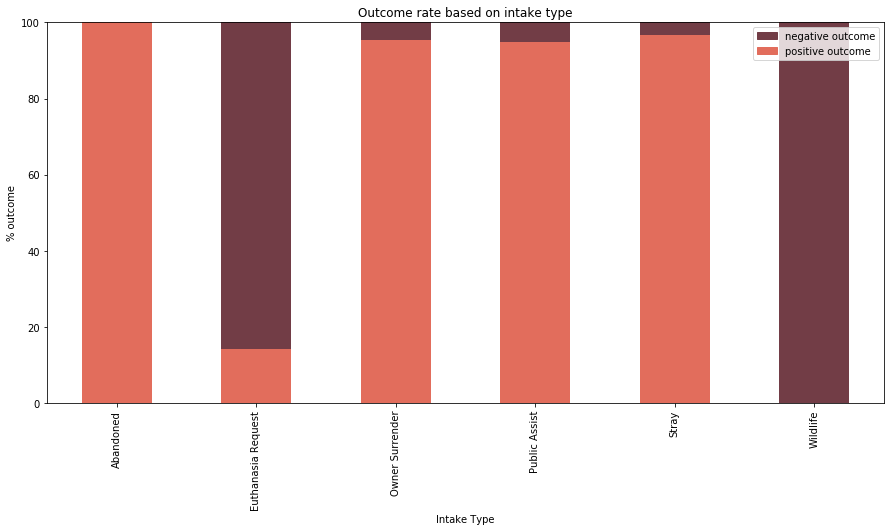

In [224]:
#Using code from the module lab
intake_types = pd.unique(df.Intake_Type.ravel())

df['percent'] = 0

for i in intake_types:
    count = 1 / df[df.Intake_Type == i].count()['binary_outcome']
    index_list = df[df['Intake_Type'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Intake_Type','binary_outcome']].groupby(['Intake_Type','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Outcome rate based on intake type", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Intake Type")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

Observations:
- The Intake Type appears to have a high impact on the target outcome, with vast differences between the feature's values. A *Wildlife* intake type has a 100% chance of a negative outcome, and a *Euthanasia Request* approximately 90% chance of a negative outcome, while an *Abandoned* intake type has a 100% chance of a positive outcome.
- There are large differences in outcome likelihood between the different values, and we can conclude that Intake Type is likely a good indicator for our target outcome.

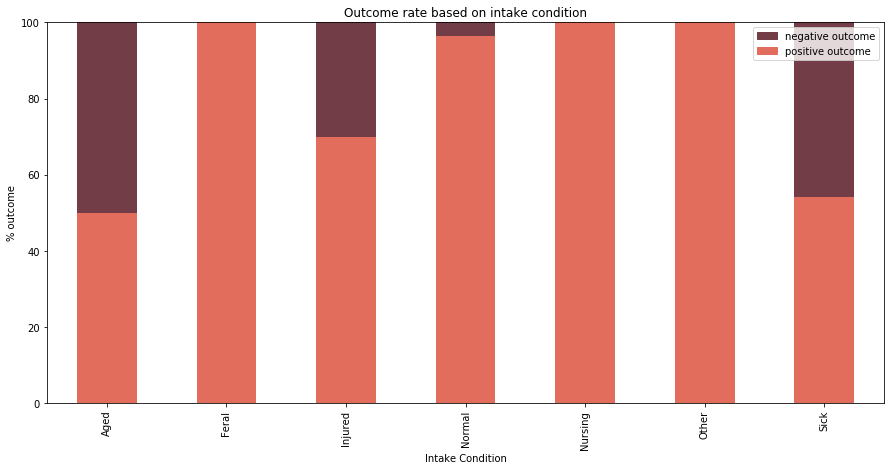

In [225]:
# Using code from the module lab
intake_conditions = pd.unique(df.Intake_Condition.ravel())

df['percent'] = 0

for i in intake_conditions:
    count = 1 / df[df.Intake_Condition == i].count()['binary_outcome']
    index_list = df[df['Intake_Condition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Intake_Condition','binary_outcome']].groupby(['Intake_Condition','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Outcome rate based on intake condition", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Intake Condition")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

Observations:
- There is some variation between different values in terms of the target outcome, with *Aged*, *Injured* and *Sick* animals having a higher chance of a negative outcome.
- This feature seems to be a good marker of the target outcome.
- However, it must be noted that that Aged and Sick animals only represent a small portion of animal intakes so the sample size may not be big enough to be significant. 
- It must also be noted that *Aged* does not represent all old animals that come into the shelter (see dataset queries below). The impact of the animal's age upon intake will be looked at further down under "continuous vs. categorical".

In [226]:
num_aged = df[df.Intake_Condition == 'Aged'].Animal_ID.count()
print("There are {} animals with intake condition of 'Aged'" .format(num_aged))
df[(df.Intake_Condition == 'Aged')].Animal_Type

num_over_10 = df[df.Age_upon_Intake >= 10].Animal_ID.count()
print("There are {} animals with intake age over 10 years" .format(num_over_10))

There are 4 animals with intake condition of 'Aged'
There are 47 animals with intake age over 10 years


In [227]:
# Age of the animals that came in with a condition of 'Aged'
df[df.Intake_Condition == 'Aged'].Age_upon_Intake

256    10.0
598    12.0
601    14.0
673    13.0
Name: Age_upon_Intake, dtype: float64

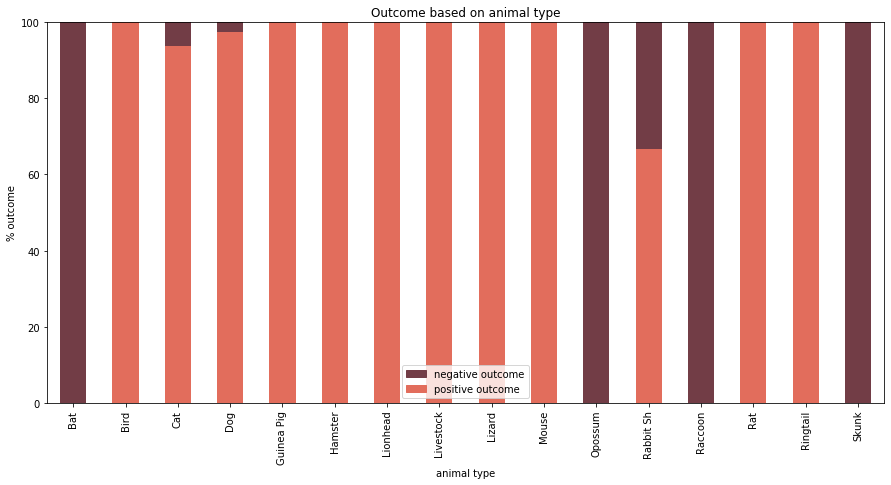

In [228]:
animal_types = pd.unique(df.Animal_Type.ravel())

df['percent'] = 0

for i in animal_types:
    count = 1 / df[df.Animal_Type == i].count()['binary_outcome']
    index_list = df[df['Animal_Type'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Animal_Type','binary_outcome']].groupby(['Animal_Type','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Outcome based on animal type",\
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("animal type")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

Observations:
    - It is very clear from the chart that wild animal types (such as bats, opossums, raccoons and skunks) have a much higher likelihood of a negative outcome. This ties in with our earlier finding regarding the *Wildlife* intake type.
    - Since rodent pets (Guinea Pig, Hamster, Mouse, Rat) all have 100% positive outcome, it may be a good idea to group them into one animal type to reduce the cardinality of this feature and make it more meaningful for a future ML model. (Though we must keep in mind that they represent a small number of cases, so this may not hold true in a bigger sample of animals).
    - There is also a small difference (of approximately 3%) in the outcome for dogs and cats, with cats slightly less likely to have a positive outcome.

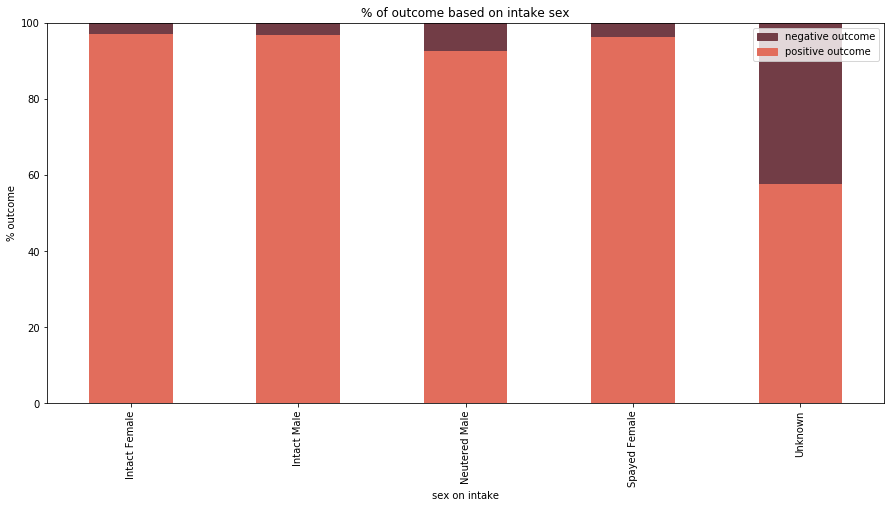

In [229]:
intake_sex = pd.unique(df.Sex_upon_Intake.ravel())

df['percent'] = 0

for i in intake_sex:
    count = 1 / df[df.Sex_upon_Intake == i].count()['binary_outcome']
    index_list = df[df['Sex_upon_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Sex_upon_Intake','binary_outcome']].groupby(['Sex_upon_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="% of outcome based on intake sex", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("sex on intake")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

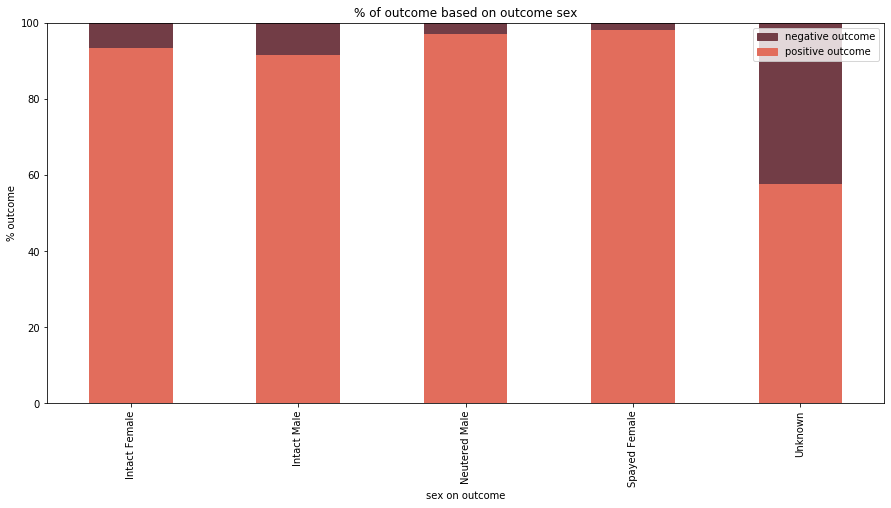

In [230]:
outcome_sex = pd.unique(df.Sex_upon_Outcome.ravel())

df['percent'] = 0

for i in outcome_sex:
    count = 1 / df[df.Sex_upon_Outcome == i].count()['binary_outcome']
    index_list = df[df['Sex_upon_Outcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Sex_upon_Outcome','binary_outcome']].groupby(['Sex_upon_Outcome','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="% of outcome based on outcome sex", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("sex on outcome")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

Observations:
- There is not much difference in the outcome between male and female, and there is a small difference between Intact and Neutered/Spayed.
- There is however, a marked difference in the target outcome for animals of unknown sex (both on Intake and Outcome). Close to 50% of animals of unknown sex have a negative outcome, compared between 2% and 5% for other sex types.
- Animals that remain *Intact* on outcome seem more likely to have a negative outcome. However, causality is unclear here. It could be that an animal with a negative outcome did not have time to get spayed or neutered at the shelter before that negative outcome occurring. So the fact that they stayed intact could be a consequence of the negative outcome, rather than the other way around. Further investigation (like the difference between Intake Date and Outcome Date) for those cases would be required to gain a better view of causality.
- The causality for animals with *Unknown* sex also needs further investigation. Is the sex unknown because they are wild animals, and therefore is it the fact that they are a wild animal that makes them more likely to have a negative outcome, rather than the unknow sex type?

In [231]:
# Checking the animal types of animals with unknown sex on intake
df[df.Sex_upon_Intake == 'Unknown'].groupby('Animal_Type').Animal_ID.count()

Animal_Type
Bat          21
Bird          4
Cat          40
Dog           5
Hamster       1
Lizard        1
Mouse         1
Rabbit Sh     2
Raccoon       9
Ringtail      1
Skunk         2
Name: Animal_ID, dtype: int64

In [232]:
# Checking the animal types of animals with unknown sex on intake and a negative outcome
df[(df.Sex_upon_Intake == 'Unknown') & (df.binary_outcome == 1.0)].groupby('Animal_Type').Animal_ID.count()

Animal_Type
Bat          21
Cat           2
Dog           2
Rabbit Sh     1
Raccoon       9
Skunk         2
Name: Animal_ID, dtype: int64

- Checking the animal types of animals with unknown sex above, we can see that many of them are indeed wild (21 bats, 9 raccoons...) however there is a large number of cats of unknown sex. 
- But if we dig a little deeper, we can see that the animals of unknown sex that met a negative outcome are almost all wild animals. I would therefore argue that it's more likely the fact that an animal is wild, rather than the fact that its sex is unknown, that impacts the target outcome.

- As a result, although the Sex_upon_Intake and Sex_upon_Outcome features initially appear to be strong markers, they are not. I would not remove them from a machine learning model though, as even a small impact on non-wild animals might still be interesting to take into account.

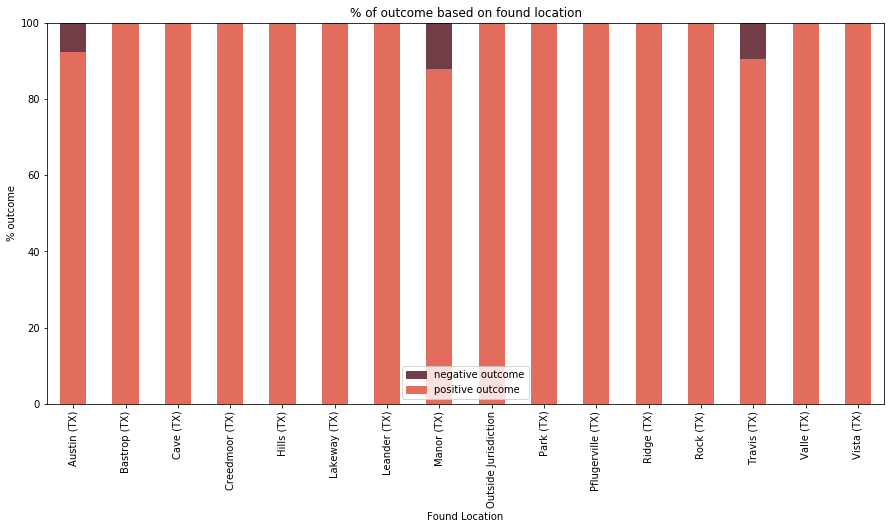

In [233]:
#Using code from the module lab
found_locations = pd.unique(df.Found_Location.ravel())

df['percent'] = 0

for i in found_locations:
    count = 1 / df[df.Found_Location == i].count()['binary_outcome']
    index_list = df[df['Found_Location'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Found_Location','binary_outcome']].groupby(['Found_Location','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="% of outcome based on found location", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Found Location")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

Observations:
- Austin, Manor, and Travis addresses appear to have a higher likelihood of a negative outcome. However, this could be due to the fact that we simply have higher animal volumes from those 3 areas, and the other areas have too small a sample to be of any significance.

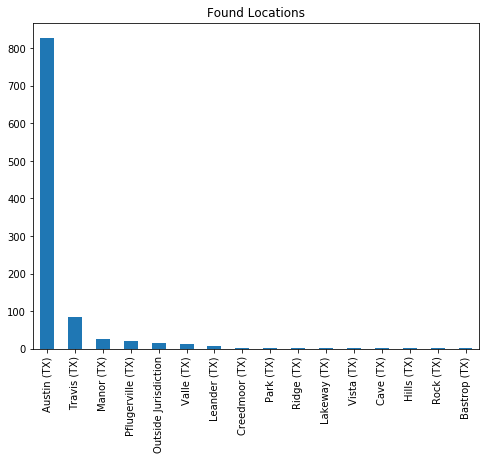

In [234]:
# plotting the found locations to examine intake volumes
df['Found_Location'].value_counts().plot(kind='bar', title='Found Locations', figsize=(8,6))
plt.show()

Further observations:
- Looking at the distributions of for different locations, we see that Manor and Pflugerville for example have a similar intake amount, however there are 0% negative outcomes from Pflugerville, but more than 10% for Manor, so sample size is not the issue.

In [235]:
num_neg_from_Austin = df[(df.Found_Location == 'Austin (TX)') & (df.binary_outcome == 1.0)].Animal_ID.count()
total_austin = df[df.Found_Location == 'Austin (TX)'].Animal_ID.count()
percent_neg_austin = num_neg_from_Austin / total_austin

print("Percentage of animals from Austin with a negative outcome: ", percent_neg_austin * 100)

num_neg_from_manor = df[(df.Found_Location == 'Manor (TX)') & (df.binary_outcome == 1.0)].Animal_ID.count()
total_manor = df[df.Found_Location == 'Manor (TX)'].Animal_ID.count()
percent_neg_manor = num_neg_from_manor / total_manor

print("Percentage of animals from Manor with a negative outcome: " , percent_neg_manor * 100)

num_neg_from_travis = df[(df.Found_Location == 'Travis (TX)') & (df.binary_outcome == 1.0)].Animal_ID.count()
total_travis = df[df.Found_Location == 'Travis (TX)'].Animal_ID.count()
percent_neg_travis = num_neg_from_travis / total_travis

print("Percentage of animals from Travis with a negative outcome: " , percent_neg_travis * 100)

Percentage of animals from Austin with a negative outcome:  7.496977025392987
Percentage of animals from Manor with a negative outcome:  12.0
Percentage of animals from Travis with a negative outcome:  9.523809523809524


In [236]:
df[(df.Found_Location == 'Manor (TX)') & (df.binary_outcome == 1.0)].Animal_Type

131    Dog
447    Dog
590    Dog
Name: Animal_Type, dtype: object

The percentages above confirm more precise variations across different locations. So we can conclude that Found Location is likely to be an indicator of the target outcome. (particularly after checking above that was this was not due to more wild animals being found in Manor for example)

### Continuous vs. categorical

There are only 2 continuous features in our dataset that can be plotted against the binary outcome: Age_upon_Intake and Age_upon_Outcome

#### Box plots

<Figure size 432x288 with 0 Axes>

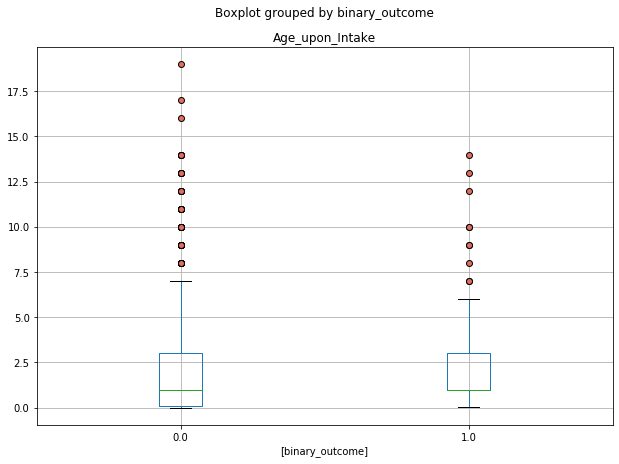

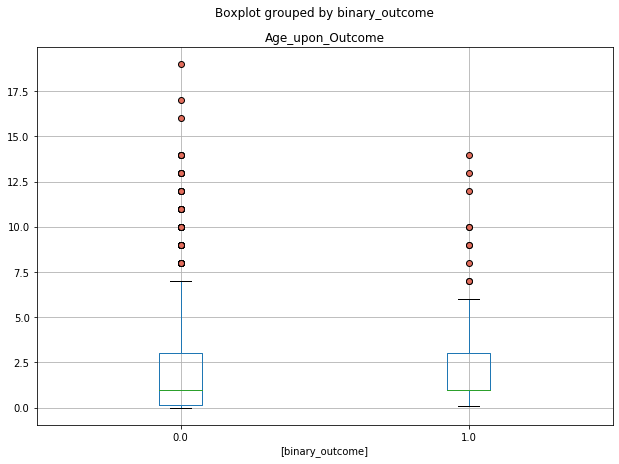

In [237]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='#E26D5C', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age_upon_Intake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['Age_upon_Outcome'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))
plt.show()

Observations:
- Age_upon_Intake and Age_upon_Outcome appear to affect the target outcome in the same way.
- I would have expected the older animals to have a higher likelihood of a negative outcome (binary_outcome = 1.0) but that is not the case.
- The box plots show that the median Age_upon_Intake and median Age_upon_Outcome is the same regardless of the target outcome.
- The main difference between the target outcomes appears to be in the value of the first quartile: 25% of animals with a positive outcome have an age of approximately less than 3 months while 25% of animals with a negative outcome have an age of approximately less than 1 year. The interquartile range for a positive outcome is approximately 0.3 years old to 2.75 years old and the interquartile range for a negative outcome is approximately 1 year old to 2.75 years old (for both Age features).
- From this we can see that animals under 1 year old (excluding 1 year old as an age) are less likely to have a negative outcome. However, past that age there is not much difference in outcome.

- Age as a continuous feature does not seem like a great indicator, however the fact whether an animal is under 1 year old, or 1 year and older might be a better indicator.

- We can also note that there is no meaningful difference in impact between our two different age features, as expected given their high correlation.

#### Histograms

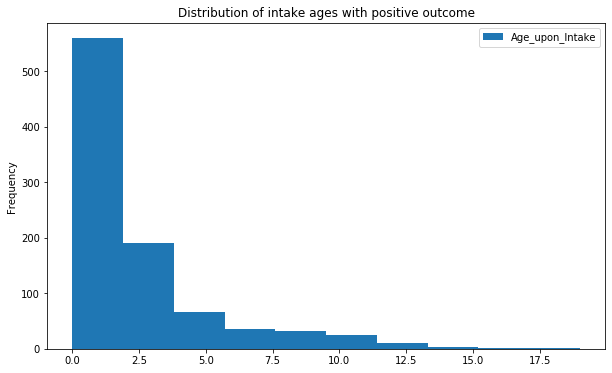

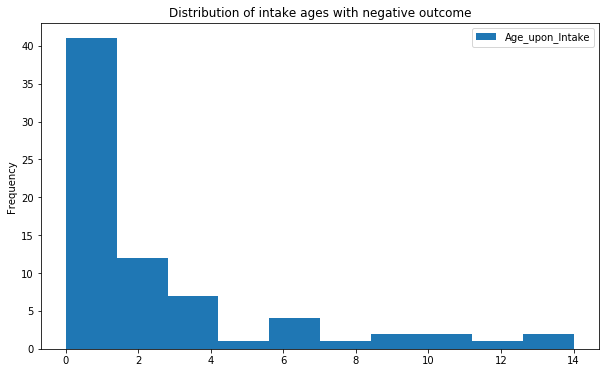

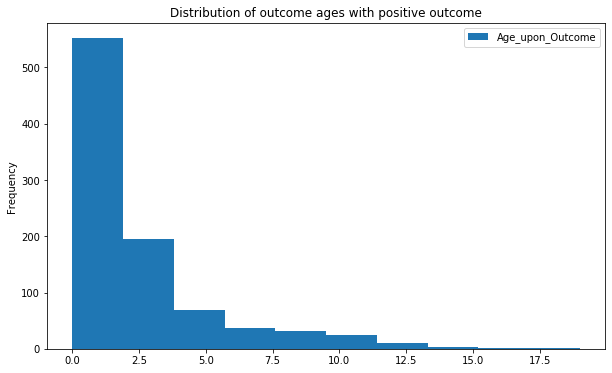

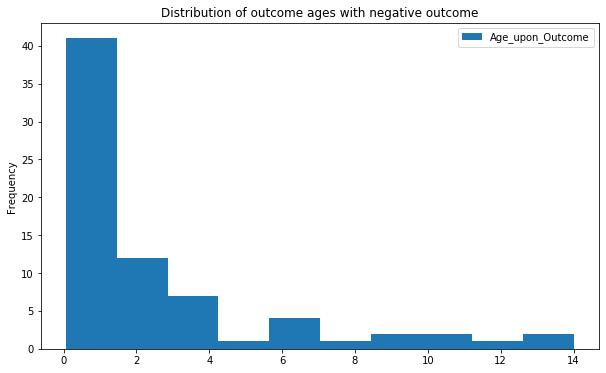

In [238]:
df[df['binary_outcome'] == 0.0][['Age_upon_Intake']].plot(kind='hist', figsize=(10,6), bins=10, title="Distribution \
of intake ages with positive outcome")
df[df['binary_outcome'] == 1.0][['Age_upon_Intake']].plot(kind='hist', figsize=(10,6), bins=10, title="Distribution \
of intake ages with negative outcome")

df[df['binary_outcome'] == 0.0][['Age_upon_Outcome']].plot(kind='hist', figsize=(10,6), bins=10, title="Distribution \
of outcome ages with positive outcome")
df[df['binary_outcome'] == 1.0][['Age_upon_Outcome']].plot(kind='hist', figsize=(10,6), bins=10, title="Distribution \
of outcome ages with negative outcome")

Observations:
- There are no significant differences in the shape of the distributions between positive outcomes and negative outcomes. This confirms that the age features are not good indicators of our target outcome.

### Time series correlations

As mentioned in part 1, it would be interesting to visualise our time series data to see if there is any correlation between the number of animals taken in and the number of negative outcomes over time. This would enable us to test if perhaps larger numbers of animals at certain points in time are linked to higher levels of negative outcomes.

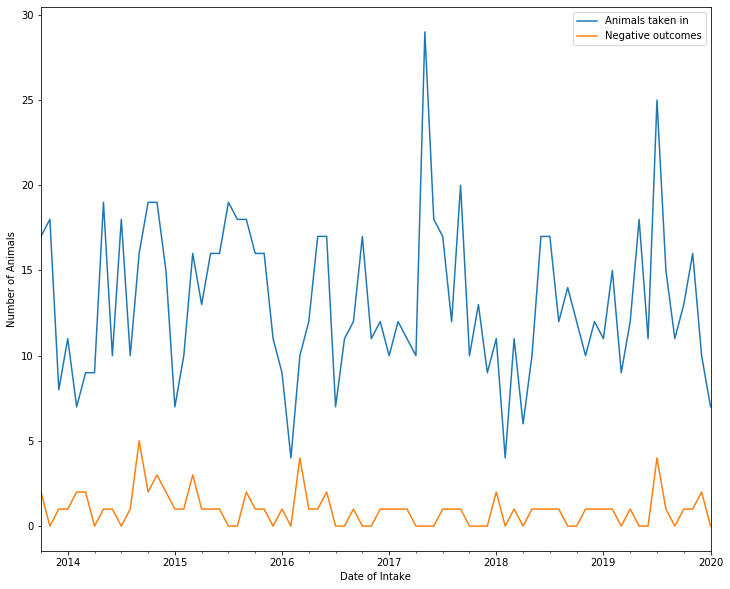

In [239]:
# Plot number of intakes and number of negative outcomes over time (by intake dates)
df['DateTime_Intake'] = pd.to_datetime(df['DateTime_Intake'])
df1 = df[['Animal_ID', 'DateTime_Intake', 'binary_outcome']]
df1.index = df1['DateTime_Intake']
ax = df1.resample('M').Animal_ID.count().plot(figsize=(12,10)) # no. of intakes aggregated by month
df1.resample('M').binary_outcome.sum().plot(figsize=(12,10)) # negative outcomes aggregated by month
ax.set_xlabel('Date of Intake')
ax.set_ylabel('Number of Animals')
plt.legend(['Animals taken in', 'Negative outcomes'])
plt.show()

In [240]:
# Verifying by calculating correlation coefficient
df1.resample('M').binary_outcome.sum().corr(df1.resample('M').Animal_ID.count())

0.22603017759579658

The two line charts have different shapes and there is no obvious strong correlation. The low correlation coefficient calculated above confirms this weak relationship between these two aggregated features. We can deduct that shelter overcrowding is unlikely to be a risk factor for the animal's outcome.

### Summary of findings

The investigations above have revealed some interesting insights.

- The main takeaway from the different features investigated is that whether an animal is wild or not seems to be a very strong marker of the target outcome. This is apparent through a number of features, such the Intake_Type and the Animal_Type. Even a feature like the sex of the animal that initially seemed like a very strong marker, was revealed to be so only because the animals with an unknown sex who had negative outcomes were wild animals.

- The Intake_Type is a good indicator of outcome, not only for intake types of Wildlife.

- The Intake_Condition also seems like a good indicator of outcome, with Aged, Injured, or Sick animals showing higher rates of negative outcomes.

- The Found_Location is likely to be a marker as well, with some cities like Manor (TX) showing higher rates of negative outcomes.

- Surprisingly, Age (whether on Intake or Outcome) was not found to be a strong marker. However, animals younger than 1 year old (excluded) seem less likely to have a negative outcome. This impact is not continuous as the animal's age increases, so it seems to be more of a categorical marker.

# 4. Transforming, extending or combining the existing features to create new features

In [241]:
# load latest cleaned dataset
df = pd.read_csv('AnimalWelfareRisk_postDQPlan.csv')

### New feature 1: Length of stay (in days)

The length of stay of an animal at a shelter can have an impact on the likelihood of their adoption (and therefore the target outcome), as they can get depressed and less attractive to potential adopters if their shelter stay is extended. This new feature can be derived from our DateTime_Intake and DateTime_Outcome features.

In [242]:
# The conversion to csv and back has reset the data types
# Convert dates to datetime data type
to_datetime = ['DateTime_Intake', 'DateTime_Outcome']
for column in to_datetime:
    df[column] =  pd.to_datetime(df[column])

df['Length_of_Stay'] = df.DateTime_Outcome - df.DateTime_Intake

# timedelta type result needs to be converted into a number of days
df['Length_of_Stay'] = df.Length_of_Stay.apply(lambda x: x.days)

df.head()

,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome,Length_of_Stay
0,A751569,Ebzy,2017-06-09 15:26:00,Austin (TX),Stray,Normal,Cat,Intact Female,0.250000,Domestic Shorthair,Black,2017-06-19 17:34:00,Intact Female,0.250000,0.0,10
1,A742125,*Marcelle,2017-01-15 12:24:00,Austin (TX),Stray,Sick,Cat,Intact Male,1.000000,Domestic Shorthair,Black/White,2017-02-04 14:27:00,Intact Male,1.000000,0.0,20
2,A715769,M. Kiki,2015-11-09 14:41:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14.000000,Domestic Shorthair,Orange Tabby,2015-12-10 13:11:00,Neutered Male,14.000000,0.0,30
3,A719223,Flower,2016-01-15 14:47:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,11.000000,Other,Black,2016-02-15 12:10:00,Spayed Female,11.000000,0.0,30
4,A724757,NaN,2016-04-21 13:53:00,Austin (TX),Stray,Normal,Cat,Unknown,0.038462,Domestic Shorthair,Other,2016-04-21 17:03:00,Unknown,0.038462,0.0,0


#### Visualise the distribution of this new feature

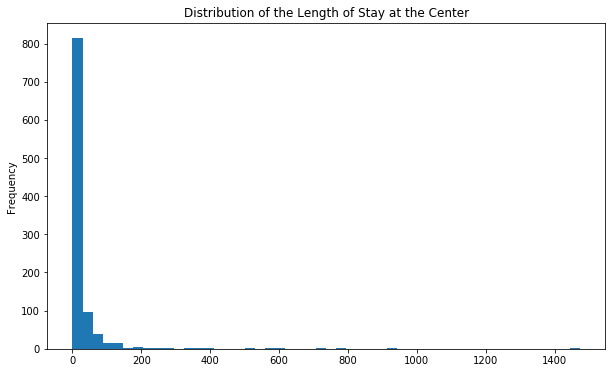

In [243]:
# Histogram
df['Length_of_Stay'].plot(kind='hist', figsize=(10,6), bins=50, title="Distribution of the Length of Stay at the Center")
plt.show()

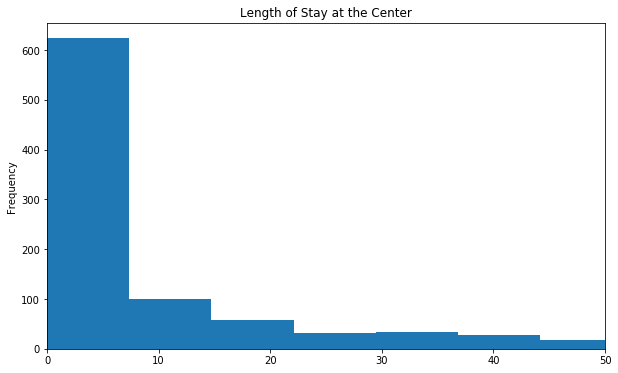

In [244]:
# Histogram - zoomed in on lower values for Length_of_Stay
df['Length_of_Stay'].plot(kind='hist', figsize=(10,6), bins=200, title="Length of Stay at the Center")
plt.xlim(xmin=0, xmax=50) 
plt.show()

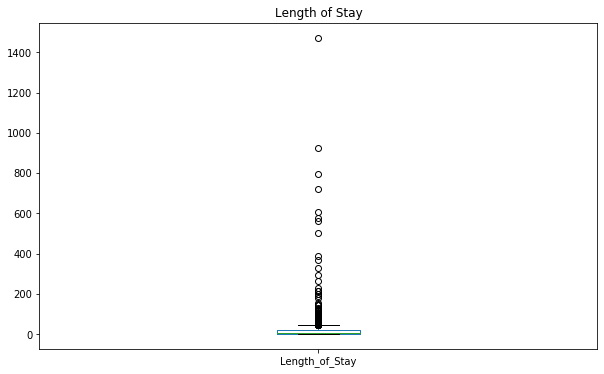

In [245]:
# box plot
df['Length_of_Stay'].plot(kind='box', title='Length of Stay', figsize=(10,6))
plt.show()

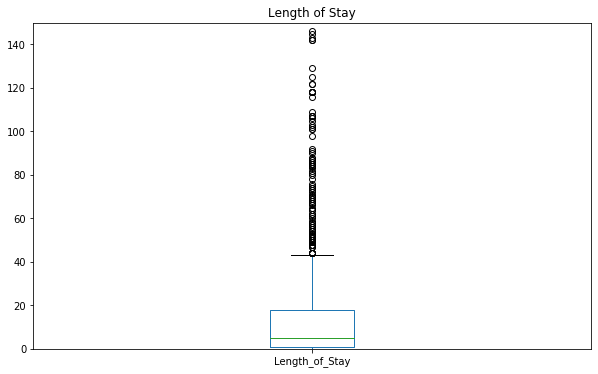

In [246]:
# box plot - zoomed in on lower values
df['Length_of_Stay'].plot(kind='box', title='Length of Stay', figsize=(10,6))
plt.ylim(ymin=0, ymax=150)
plt.show()

As we can see on the histograms and box plots, this new feature is highly skewed right, with a very long tail of outliers. It may be useful to curb some the outliers, but I'd like to check for correlation with target outcome first to ensure we don't lose any meaningful data.

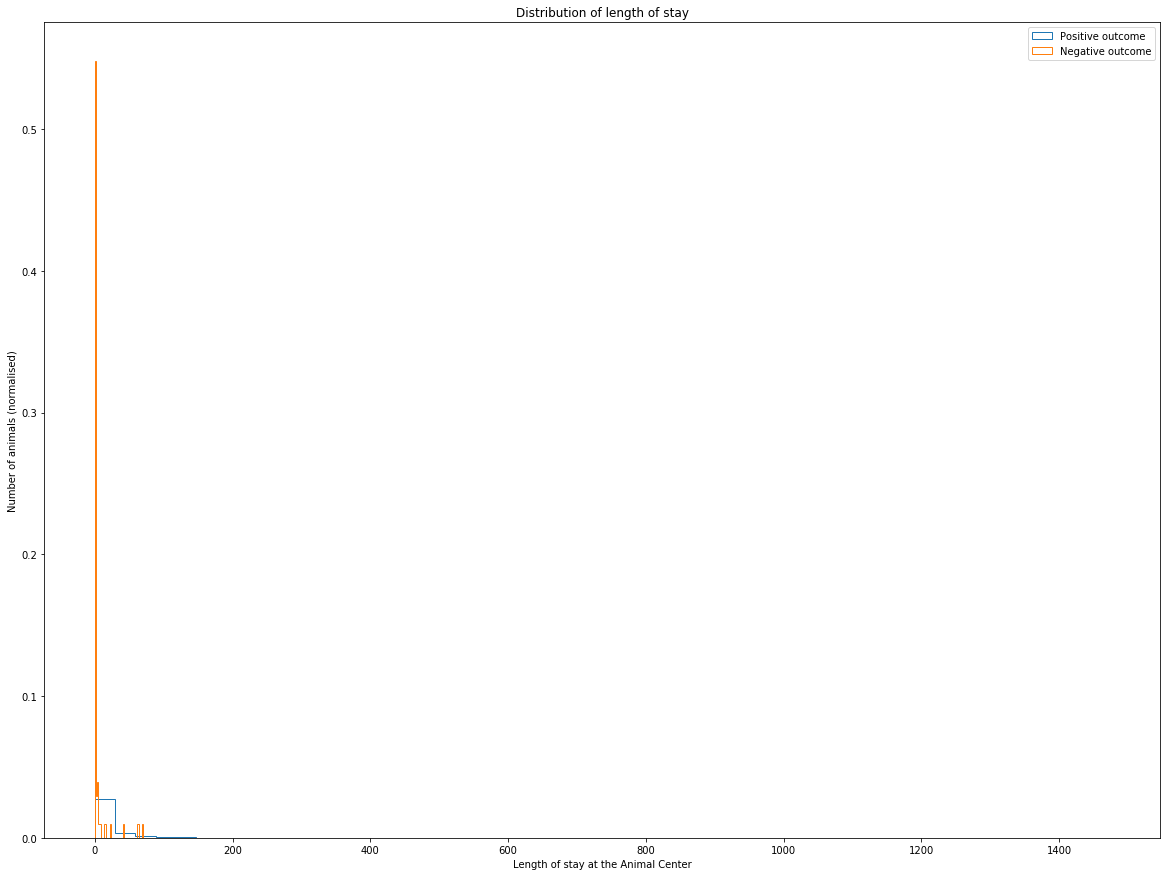

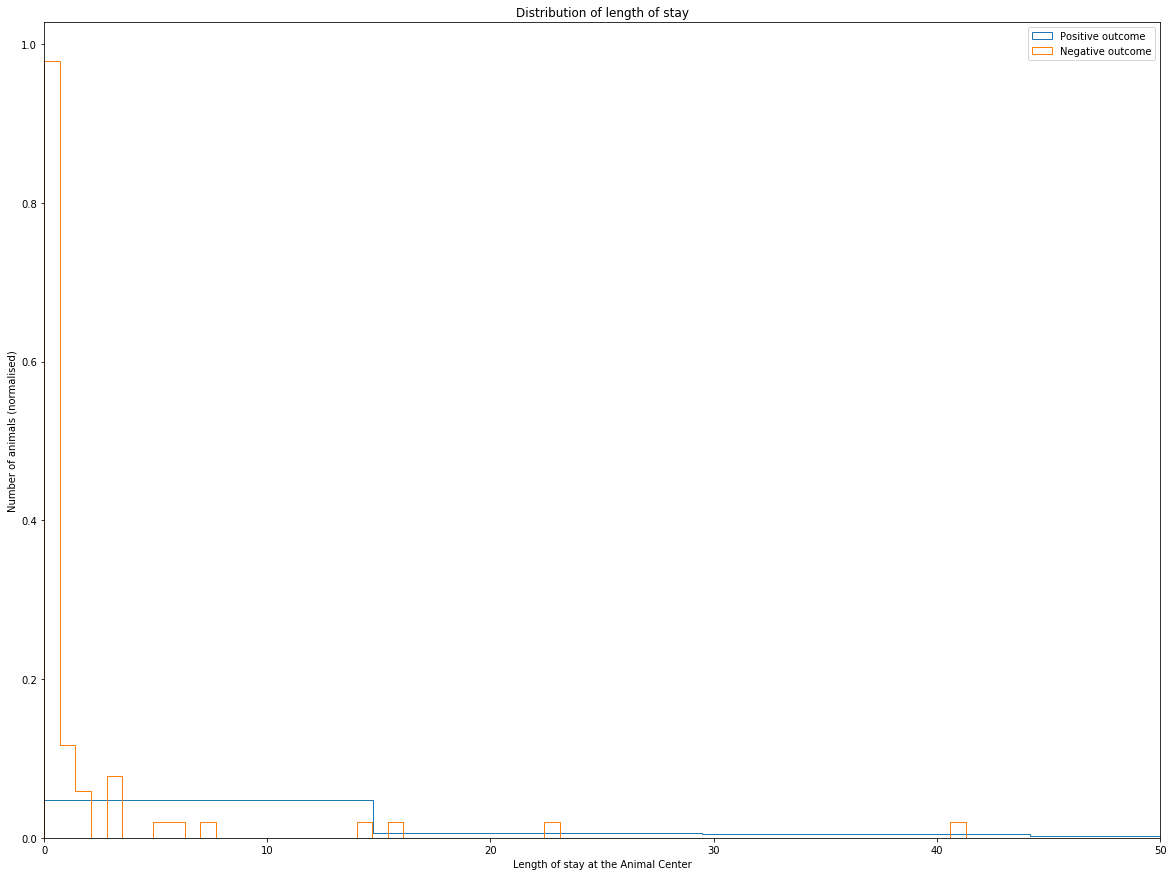

In [247]:
df_pos = df[df['binary_outcome'] == 0.0]
df_neg = df[df['binary_outcome'] == 1.0]

plt.figure(figsize=(20,15))
values1 = df_pos['Length_of_Stay']
values2 = df_neg['Length_of_Stay']
plt.hist(values1, bins=50, histtype='step', density=True)
plt.hist(values2, bins=50, histtype='step', density=True)
plt.title('Distribution of length of stay')
plt.xlabel('Length of stay at the Animal Center')
plt.ylabel('Number of animals (normalised)')
plt.legend(['Positive outcome', 'Negative outcome'])
plt.show()

# zooming in
plt.figure(figsize=(20,15))
plt.hist(values1, bins=100, histtype='step', density=True)
plt.hist(values2, bins=100, histtype='step', density=True)
plt.xlim(xmin=0, xmax=50) 
plt.title('Distribution of length of stay')
plt.xlabel('Length of stay at the Animal Center')
plt.ylabel('Number of animals (normalised)')
plt.legend(['Positive outcome', 'Negative outcome'])
plt.show()


The distributions of the new feature for each target outcome are quite different. The vast majority of cases with a negative outcome stayed in the center for 1 day or less. Causality is doubtful here though, as such a short length of stay could be a reflection of the negative outcome rather than a driver.

We can curtail the outliers with high values for Length_of_Stay without affecting the meaning and effect on the target outcome (as long as they are kept and brought back down to a lower value). Looking at the box plot, there is a natural break around 130 days, with outliers scattered more widely after that value.

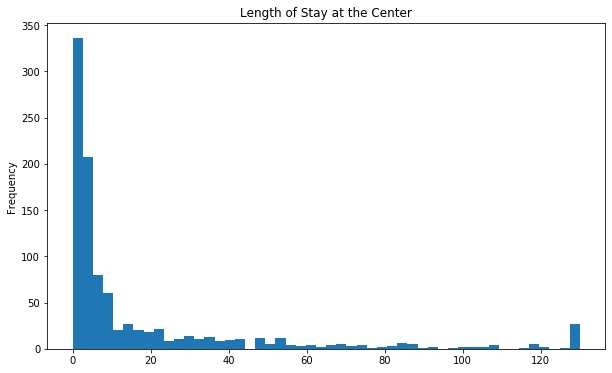

In [248]:
df['Length_of_Stay'] = df.Length_of_Stay.apply(lambda x: 130 if x > 130 else x)
# Histogram
df['Length_of_Stay'].plot(kind='hist', figsize=(10,6), bins=50, title="Length of Stay at the Center")
plt.show()

### New feature 2: Named/Not Named

Transforming the Name feature into a Named/Not Named binary feature might reveal insights into whether this affects the outcome.

In [249]:
# replace missing values with '0' flag
df['Name'] = df.Name.replace(np.nan, "N")

# replace individual names with 'Named' flag
df['Name'] = df.apply(lambda row: 'Y' if row['Name'] != 'N' else row['Name'], axis=1)

# checking value counts are still correct
df.groupby('Name').Animal_ID.count()

# updating column name to reflect binary status of values
df.rename(columns={'Name': 'Named'}, inplace=True)

df.head()

,Animal_ID,Named,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome,Length_of_Stay
0,A751569,Y,2017-06-09 15:26:00,Austin (TX),Stray,Normal,Cat,Intact Female,0.250000,Domestic Shorthair,Black,2017-06-19 17:34:00,Intact Female,0.250000,0.0,10
1,A742125,Y,2017-01-15 12:24:00,Austin (TX),Stray,Sick,Cat,Intact Male,1.000000,Domestic Shorthair,Black/White,2017-02-04 14:27:00,Intact Male,1.000000,0.0,20
2,A715769,Y,2015-11-09 14:41:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14.000000,Domestic Shorthair,Orange Tabby,2015-12-10 13:11:00,Neutered Male,14.000000,0.0,30
3,A719223,Y,2016-01-15 14:47:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,11.000000,Other,Black,2016-02-15 12:10:00,Spayed Female,11.000000,0.0,30
4,A724757,N,2016-04-21 13:53:00,Austin (TX),Stray,Normal,Cat,Unknown,0.038462,Domestic Shorthair,Other,2016-04-21 17:03:00,Unknown,0.038462,0.0,0


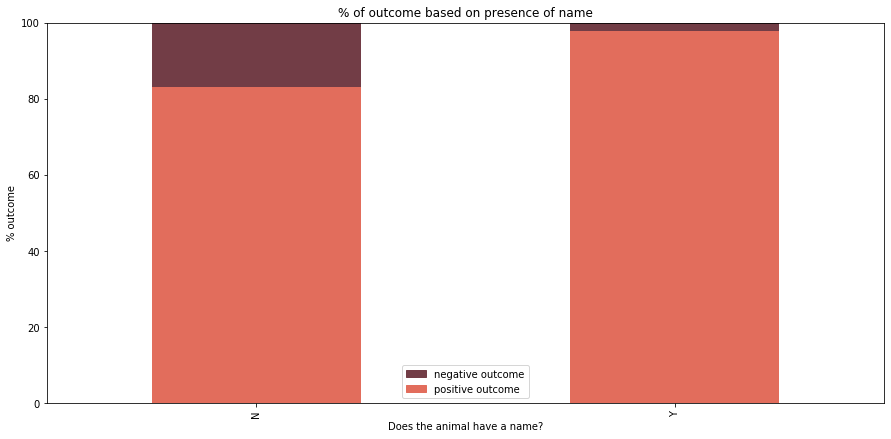

In [250]:
named = pd.unique(df.Named.ravel())

df['percent'] = 0

for i in named:
    count = 1 / df[df.Named == i].count()['binary_outcome']
    index_list = df[df['Named'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Named','binary_outcome']].groupby(['Named','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="% of outcome based on presence of name", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Does the animal have a name?")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

This feature does see to be a good marker, with named animals approximately 15% less likely to have a negative outcome.

### New feature 3: Wild flag

The investigations in part 3 revealed that whether an animal was wild or not was a very strong indicator for the target outcome. Adding a Wild / Not Wild feature to capture this effect more directly could be very useful as a marker in a future machine learning model.

In [251]:
# Checking the data to derive the rules

df[df.Intake_Type == 'Wildlife'].groupby('Animal_Type').Animal_ID.count()

Animal_Type
Bat          19
Opossum       1
Rabbit Sh     1
Raccoon       9
Skunk         2
Name: Animal_ID, dtype: int64

In [252]:
df[df.Intake_Type == 'Public Assist'].groupby('Animal_Type').Animal_ID.count()

Animal_Type
Bat      2
Bird     1
Cat      6
Dog     50
Name: Animal_ID, dtype: int64

In [253]:
df[df.Animal_Type == 'Rabbit Sh'].Intake_Type

107       Stray
400       Stray
585    Wildlife
Name: Intake_Type, dtype: object

As we can see above, the Wildlife Intake Type does not capture all wild animals. We can use a list of animal types instead, to make sure all the bats are included.

However, not all rabbits are wild so they cannot simply be added to the list. A more complex rule must be applied in the case of rabbits so stray rabbits are not marked as wild.

In [254]:
wild_animals = ['Bat', 'Opossum', 'Raccoon', 'Skunk']
df['Wild'] = df.apply(lambda row: 'Y' if row['Animal_Type'] in wild_animals else 'N', axis=1)
df['Wild'] = df.apply(lambda row: 'Y' if (row['Animal_Type'] == 'Rabbit Sh') & (row['Intake_Type'] == 'Wildlife')\
                      else 'N', axis=1)
df.head()

,Animal_ID,Named,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome,Length_of_Stay,percent,Wild
0,A751569,Y,2017-06-09 15:26:00,Austin (TX),Stray,Normal,Cat,Intact Female,0.250000,Domestic Shorthair,Black,2017-06-19 17:34:00,Intact Female,0.250000,0.0,10,0.151976,N
1,A742125,Y,2017-01-15 12:24:00,Austin (TX),Stray,Sick,Cat,Intact Male,1.000000,Domestic Shorthair,Black/White,2017-02-04 14:27:00,Intact Male,1.000000,0.0,20,0.151976,N
2,A715769,Y,2015-11-09 14:41:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14.000000,Domestic Shorthair,Orange Tabby,2015-12-10 13:11:00,Neutered Male,14.000000,0.0,30,0.151976,N
3,A719223,Y,2016-01-15 14:47:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,11.000000,Other,Black,2016-02-15 12:10:00,Spayed Female,11.000000,0.0,30,0.151976,N
4,A724757,N,2016-04-21 13:53:00,Austin (TX),Stray,Normal,Cat,Unknown,0.038462,Domestic Shorthair,Other,2016-04-21 17:03:00,Unknown,0.038462,0.0,0,0.292398,N


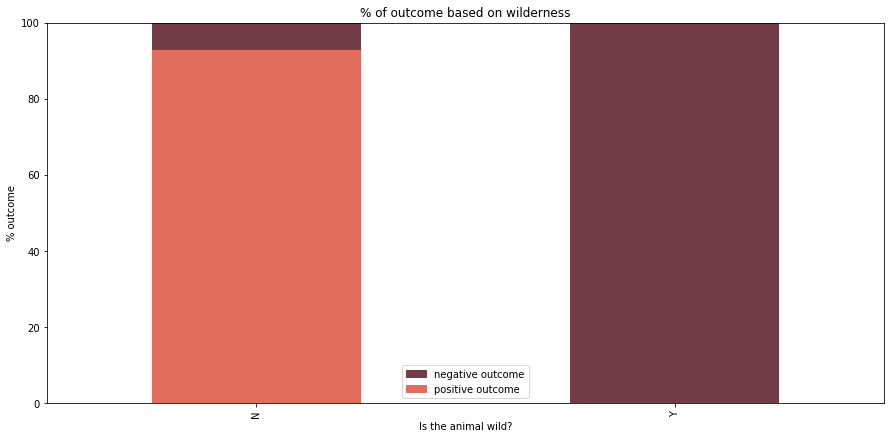

In [255]:
wild = pd.unique(df.Wild.ravel())

df['percent'] = 0

for i in wild:
    count = 1 / df[df.Wild == i].count()['binary_outcome']
    index_list = df[df['Wild'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Wild','binary_outcome']].groupby(['Wild','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="% of outcome based on wilderness", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Is the animal wild?")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

As expected, this feature is a very strong marker of the target outcome. 100% of wild animals have a negative outcomes, while less than 10% of non wild animals do.

### New feature 4: Younger than 1 year

It was noted in part 3 that while the age of the animal at intake does not have a continuous correlation with the target outcome, animals strictly younger than 1 year old seemed less likely to have a negative outcome. 

Adding this as a binary feature will help ascertain how much of a marker it is for the target outcome.

In [256]:
df['Younger_than_1_Intake'] = df.apply(lambda row: 'Y' if row['Age_upon_Intake'] < 1 else 'N', axis=1)

df.head()

,Animal_ID,Named,DateTime_Intake,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,DateTime_Outcome,Sex_upon_Outcome,Age_upon_Outcome,binary_outcome,Length_of_Stay,percent,Wild,Younger_than_1_Intake
0,A751569,Y,2017-06-09 15:26:00,Austin (TX),Stray,Normal,Cat,Intact Female,0.250000,Domestic Shorthair,Black,2017-06-19 17:34:00,Intact Female,0.250000,0.0,10,0.1001,N,Y
1,A742125,Y,2017-01-15 12:24:00,Austin (TX),Stray,Sick,Cat,Intact Male,1.000000,Domestic Shorthair,Black/White,2017-02-04 14:27:00,Intact Male,1.000000,0.0,20,0.1001,N,N
2,A715769,Y,2015-11-09 14:41:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14.000000,Domestic Shorthair,Orange Tabby,2015-12-10 13:11:00,Neutered Male,14.000000,0.0,30,0.1001,N,N
3,A719223,Y,2016-01-15 14:47:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,11.000000,Other,Black,2016-02-15 12:10:00,Spayed Female,11.000000,0.0,30,0.1001,N,N
4,A724757,N,2016-04-21 13:53:00,Austin (TX),Stray,Normal,Cat,Unknown,0.038462,Domestic Shorthair,Other,2016-04-21 17:03:00,Unknown,0.038462,0.0,0,0.1001,N,Y


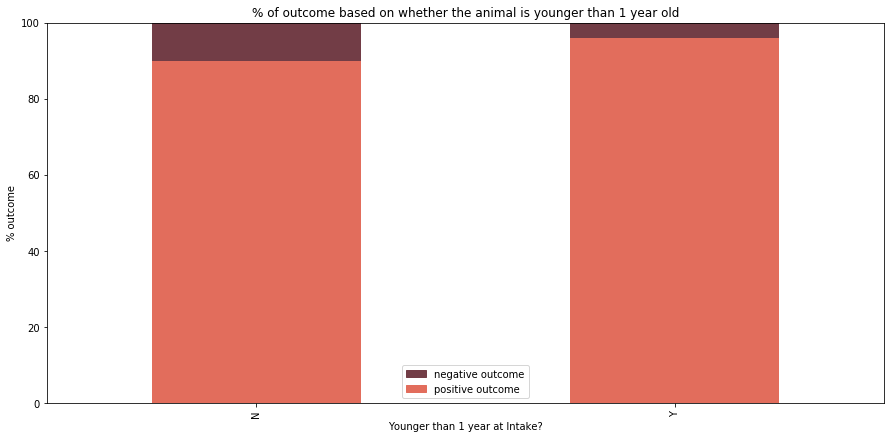

In [257]:
younger = pd.unique(df.Younger_than_1_Intake.ravel())

df['percent'] = 0

for i in wild:
    count = 1 / df[df.Younger_than_1_Intake == i].count()['binary_outcome']
    index_list = df[df['Younger_than_1_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','Younger_than_1_Intake','binary_outcome']].groupby(['Younger_than_1_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, \
                               title="% of outcome based on whether the animal is younger than 1 year old", \
                               figsize=(15,7), color=["#E26D5C", "#723D46"])

neg_patch = mpatches.Patch(color="#723D46", label='negative outcome')
pos_patch = mpatches.Patch(color="#E26D5C", label='positive outcome')
my_plot.legend(handles=[neg_patch, pos_patch], frameon = True)

my_plot.set_xlabel("Younger than 1 year at Intake?")
my_plot.set_ylabel("% outcome")
my_plot.set_ylim([0,100])

plt.show()

This new feature is not a strong marker, with only approximately 5% in the difference, but it is a marker nonetheless and worth keeping for a future mahcine learning model.

In [259]:
df.drop(columns=['percent'], inplace=True)
df.columns

Index(['Animal_ID', 'Named', 'DateTime_Intake', 'Found_Location',
       'Intake_Type', 'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake',
       'Age_upon_Intake', 'Breed', 'Color', 'DateTime_Outcome',
       'Sex_upon_Outcome', 'Age_upon_Outcome', 'binary_outcome',
       'Length_of_Stay', 'Wild', 'Younger_than_1_Intake'],
      dtype='object')

In [260]:
# save the dataset with the new features
df.to_csv('AnimalWelfareRisk_postDQPlan_newfeats.csv', index=False)

### Conclusion

Before building a machine learning model to predict the target outcome based on the features available, we can already draw some preliminary conclusions to help the Austin Animal Center reduce their rate of negative outcomes.

The preliminary analysis has shown that all wildlife taken into the center has had a negative outcome so far. The recommendation would be to either divert wild animals to specialised wildlife centers, where they might have a better chance of survival with specialist care, or to train up current members of staff on how to provide specialised care for wildlife.

Further conclusions can be drawn once the impact of other features can be assessed with a machine learning model.

*(Another interesting angle would be to look at the risk factors specifically for cats and for dogs, this may reveal further insights and enable further recommendations for the shelter.)*